# Project Name -- Exploratory Data Analysis on Cricket Player Performance (Web Scraped from Cricbuzz)


# Project Summary — Exploratory Data Analysis on International Cricket Players ODI Format


### 1. Project Overview

##### This project presents a comprehensive exploratory data analysis (EDA) on international cricket players’ performance, focusing on uncovering 

##### insights from batting statistics such as runs, centuries, averages, and strike rates.

##### The dataset was web-scraped from Cricbuzz, a widely recognized cricket database, and processed into a structured format for statistical and

##### visual exploration.

##### The aim of this project is to understand player performance patterns, compare efficiency across countries, analyze conversion capabilities 

##### (from 50s to 100s), and identify standout or emerging players based on consistency, conversion rate, and match-to-century ratio.

### 2. Objective

##### The key goal of this analysis is to:

##### Study and compare the batting performance of international cricketers across various countries.

##### Evaluate efficiency metrics such as conversion rate (turning 50s into 100s) and matches per century.

##### Identify top-performing and improving players using both descriptive and derived metrics.

##### Provide visually appealing, data-driven storytelling suitable for presentation, dashboarding, and portfolio demonstration.

##### Demonstrate proficiency in data cleaning, feature engineering, visualization, and analytical reasoning.

# Loading Libraries

##### The very first step in any data analysis or exploratory data analysis (EDA) project is to import the required Python libraries. These libraries 
##### act as the foundation of the entire analytical workflow, providing tools for data collection, cleaning, transformation, analysis, and 
##### visualization.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from concurrent.futures import ThreadPoolExecutor

# Web Scraping

##### In this stage of the project, web scraping was performed to collect comprehensive cricket player statistics directly from the Cricbuzz website 
##### using Python. The main goal was to build a rich, structured dataset containing real-world information on players’ performance, including 
##### matches played, innings, runs scored, batting average, strike rate, milestones (50s, 100s, 200s), boundaries (fours, sixes), and dismissal 
##### patterns (ducks, not outs), along with country and gender. The process involved using essential Python libraries such as requests to fetch web 
##### pages, BeautifulSoup from bs4 to parse and extract specific elements from the HTML structure, and ThreadPoolExecutor from concurrent.futures to 
##### enable multithreading, which significantly accelerated the scraping process by collecting data from multiple player profiles simultaneously. 
##### Each player profile was accessed dynamically by iterating through profile IDs (e.g., https://www.cricbuzz.com/profiles/{id}), and relevant 
##### information was safely extracted, cleaned, and stored in Python lists such as Player_Name, Matches, Innings, Runs, Average, Strike_Rate, and 
##### others. A custom user-agent header was added to the requests to simulate a real browser and prevent blocking by the server. The script handled 
##### errors gracefully using try-except blocks to skip unavailable or invalid pages without interrupting the workflow. Once scraping was completed, 
##### the data was consolidated into a structured form for further processing. This step is crucial as it demonstrates automation, data engineering, 
##### and data extraction skills — turning unstructured web data into a ready-to-analyze dataset. The resulting data serves as the foundation for 
##### exploratory data analysis (EDA), helping uncover insights such as player consistency, conversion rates, performance patterns by country, and 
##### identification of potential top performers, making it a real-world, end-to-end data collection and analysis pipeline.

In [ ]:

Player_Name, Matches, Innings, Runs, Balls_Faced = [], [], [], [], []
Highest_Score, Average, Strike_Rate, Not_Out = [], [], [], []
Fours, Sixes, Ducks, Fifties, Hundreds, Two_Hundreds, Country, Gender = [], [], [], [], [], [], [], []

headers = {"User-Agent": "Mozilla/5.0"}

def scrape_profile(i):
    url = f"https://www.cricbuzz.com/profiles/{i}"
    try:
        page = requests.get(url, headers=headers, timeout=5)
        soup = BeautifulSoup(page.text, "html.parser")

        target_div = soup.find("div", class_="flex flex-col gap-2")
        if not target_div:
            return

        name = soup.find("span", class_="tb:font-bold wb:text-xl wb:mt-1")
        country = soup.find("span", class_="text-xs text-cbItmBkgDark tb:text-inherit wb:text-inherit wb:text-base")

        details_div = soup.find("div", class_='grid grid-cols-3 p-2 border-b border-cbBorderGrey')
        gender = "Female" if details_div and "Women" in details_div.text else "Male"

        # Default values
        player_data = {
            "Matches": "N/A",
            "Innings": "N/A",
            "Runs": "N/A",
            "Balls": "N/A",
            "Highest": "N/A",
            "Average": "N/A",
            "SR": "N/A",
            "Not Out": "N/A",
            "Fours": "N/A",
            "Sixes": "N/A",
            "Ducks": "N/A",
            "50s": "N/A",
            "100s": "N/A",
            "200s": "N/A"
        }

        # Extract stats safely
        td_elements = target_div.find_all("td")
        for j in range(0, len(td_elements) - 2):
            key = td_elements[j].text.strip()
            if key in player_data:
                player_data[key] = td_elements[j+2].text.strip()

        # Append once per player
        Player_Name.append(name.text.strip() if name else "N/A")
        Country.append(country.text.strip() if country else "N/A")
        Gender.append(gender)
        Matches.append(player_data["Matches"])
        Innings.append(player_data["Innings"])
        Runs.append(player_data["Runs"])
        Balls_Faced.append(player_data["Balls"])
        Highest_Score.append(player_data["Highest"])
        Average.append(player_data["Average"])
        Strike_Rate.append(player_data["SR"])
        Not_Out.append(player_data["Not Out"])
        Fours.append(player_data["Fours"])
        Sixes.append(player_data["Sixes"])
        Ducks.append(player_data["Ducks"])
        Fifties.append(player_data["50s"])
        Hundreds.append(player_data["100s"])
        Two_Hundreds.append(player_data["200s"])

    except Exception as e:
        # Optionally print errors for debugging
        # print(f"Error scraping {url}: {e}")
        pass

# Run with threads
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(scrape_profile, range(12500,14000))

print("✅ Scraping completed")
print("Total players:", len(Player_Name))


# Data Framing and making a dataset
##### Data Format: The data was initially stored as raw HTML → parsed into DataFrame → exported as Excel.

In [ ]:
data = {"Player Name":Player_Name,
        'Country':Country,
        'Gender' : Gender,
        'Matches Played': Matches,
        "Innings": Innings,
         'Runs':Runs,
        "Balls Faced":Balls_Faced,
        "Highest Score":Highest_Score,
        "Average": Average,
        "Strike Rate": Strike_Rate,
        "Not Out": Not_Out,
        "Fours": Fours,
        "Sixes": Sixes,
        "Ducks": Ducks,
        "Fifties": Fifties,
        "Hundreads": Hundreds,
        "Two Hundreads": Two_Hundreds 

       }
df = pd.DataFrame(data)

df.to_excel(r"C:\Users\user\Downloads\EDA_Finalcopy")

# Loading and analyzing Data


In [2]:
df = pd.read_excel(r"C:\Users\user\Downloads\EDA_PROJECT16161616.xlsx")
df

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
0,Sir Jack Hobbs,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
1,Morice Bird,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
2,Joe Hardstaff,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
3,Kenneth Hutchings,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
4,Young Jack Hearne,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,Ben Charlesworth,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10494,Vidyadhar Patil,India,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10495,Saarah Smith,South Africa,Female,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10496,Sujith Gowda,India,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
df.head()

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
0,Sir Jack Hobbs,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
1,Morice Bird,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
2,Joe Hardstaff,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
3,Kenneth Hutchings,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
4,Young Jack Hearne,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
df.tail()

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
10493,Ben Charlesworth,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10494,Vidyadhar Patil,India,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10495,Saarah Smith,South Africa,Female,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10496,Sujith Gowda,India,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10497,Janaka Sampath,Sri Lanka,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
df.sample(5)

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
1305,James Harris,England,Male,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0
5128,Darren Ramsammy,Canada,Male,1,1,0,3,0,0.00,0.00,0,0,0,1,0,0,0
319,Richard Ellison,England,Male,14,12,86,110,24,10.75,78.19,4,3,1,0,0,0,0
5056,Singamuthu Thiyagarajan,India,Male,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0
2147,Shashank Ranade,India,Male,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10498 entries, 0 to 10497
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player Name     10497 non-null  object 
 1   Country         10497 non-null  object 
 2   Gender          10498 non-null  object 
 3   Matches Played  10498 non-null  int64  
 4   Innings         10498 non-null  int64  
 5   Runs            10498 non-null  int64  
 6   Balls Faced     10498 non-null  int64  
 7   Highest Score   10498 non-null  int64  
 8   Average         10498 non-null  float64
 9   Strike Rate     10498 non-null  float64
 10  Not Out         10498 non-null  int64  
 11  Fours           10498 non-null  int64  
 12  Sixes           10498 non-null  int64  
 13  Ducks           10498 non-null  int64  
 14  Fifties         10498 non-null  int64  
 15  Hundreads       10498 non-null  int64  
 16  Two Hundreads   10498 non-null  int64  
dtypes: float64(2), int64(12), objec

In [7]:
df.columns

Index(['Player Name', 'Country', 'Gender', 'Matches Played', 'Innings', 'Runs',
       'Balls Faced', 'Highest Score', 'Average', 'Strike Rate', 'Not Out',
       'Fours', 'Sixes', 'Ducks', 'Fifties', 'Hundreads', 'Two Hundreads'],
      dtype='object')

In [8]:
df.describe()

,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
count,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000
mean,11.454753,9.167365,207.670604,277.672700,14.962469,5.220069,18.814009,1.660316,18.509811,2.718994,0.775767,1.085921,0.224424,0.001238
std,35.405926,30.331491,907.681138,1157.844351,33.852393,10.752626,32.661838,5.555240,84.638382,14.079204,2.383659,5.463246,1.626834,0.042527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,11.000000,23.000000,7.000000,4.330000,38.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,463.000000,452.000000,18426.000000,21367.000000,264.000000,107.000000,328.580000,84.000000,2016.000000,351.000000,34.000000,96.000000,51.000000,3.000000


In [9]:
df.isnull().sum()

Player Name       1
Country           1
Gender            0
Matches Played    0
Innings           0
Runs              0
Balls Faced       0
Highest Score     0
Average           0
Strike Rate       0
Not Out           0
Fours             0
Sixes             0
Ducks             0
Fifties           0
Hundreads         0
Two Hundreads     0
dtype: int64

# Data Cleaning and Preprocessing

##### Once the data was collected, it underwent extensive cleaning to ensure analytical reliability.

##### Steps performed:

##### Removed duplicates and null values.


In [10]:
df["Player Name"].duplicated().sum()

np.int64(91)

In [11]:

df =df[~df["Player Name"].duplicated(keep=False)]
df

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
0,Sir Jack Hobbs,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
1,Morice Bird,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
2,Joe Hardstaff,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
3,Kenneth Hutchings,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
4,Young Jack Hearne,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,Ben Charlesworth,England,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10494,Vidyadhar Patil,India,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10495,Saarah Smith,South Africa,Female,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0
10496,Sujith Gowda,India,Male,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0


### Removed entries where Matches = 0 or Runs = 0. for better understanding of data

In [12]:
df = df[(df['Matches Played'] > 0) & (df['Runs'] > 0)]
df

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
143,Brian Close,England,Male,3,3,49,50,43,16.33,98.00,0,7,1,0,0,0,0
151,Sir Colin Cowdrey,England,Male,1,1,1,5,1,1.00,20.00,0,0,0,0,0,0,0
160,Fred Titmus,England,Male,2,1,11,32,11,11.00,34.38,0,1,0,0,0,0,0
177,Ray Illingworth,England,Male,3,2,5,18,4,2.50,27.78,0,0,0,0,0,0,0
202,John Snow,England,Male,9,4,9,41,5,4.50,21.96,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,Saima Thakor,India,Female,10,6,46,97,29,7.67,47.43,0,5,0,1,0,0,0
10465,Ben Curran,Zimbabwe,Male,8,8,340,454,118,48.57,74.89,1,37,0,1,2,1,0
10468,Hayden Walsh,West Indies,Male,25,14,176,254,46,16.00,69.30,3,19,1,0,0,0,0
10487,Gareth Delany,Ireland,Male,21,18,234,246,22,18.00,95.13,5,20,6,1,0,0,0


###  Changing the index 

In [13]:
df.reset_index(drop=True, inplace=True)
df.index += 1
df

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
1,Brian Close,England,Male,3,3,49,50,43,16.33,98.00,0,7,1,0,0,0,0
2,Sir Colin Cowdrey,England,Male,1,1,1,5,1,1.00,20.00,0,0,0,0,0,0,0
3,Fred Titmus,England,Male,2,1,11,32,11,11.00,34.38,0,1,0,0,0,0,0
4,Ray Illingworth,England,Male,3,2,5,18,4,2.50,27.78,0,0,0,0,0,0,0
5,John Snow,England,Male,9,4,9,41,5,4.50,21.96,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,Saima Thakor,India,Female,10,6,46,97,29,7.67,47.43,0,5,0,1,0,0,0
2937,Ben Curran,Zimbabwe,Male,8,8,340,454,118,48.57,74.89,1,37,0,1,2,1,0
2938,Hayden Walsh,West Indies,Male,25,14,176,254,46,16.00,69.30,3,19,1,0,0,0,0
2939,Gareth Delany,Ireland,Male,21,18,234,246,22,18.00,95.13,5,20,6,1,0,0,0


### Filtered players with at least 50 matches to ensure statistical reliability.

In [14]:
df = df[df["Matches Played"]>=50]


In [15]:
df.reset_index(drop=True, inplace=True)
df.index += 1
df

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreads,Two Hundreads
1,Mike Gatting,England,Male,92,88,2095,2968,115,29.10,70.59,16,165,11,4,9,1,0
2,Bob Willis,England,Male,64,22,83,157,24,10.38,52.87,14,6,0,4,0,0,0
3,John Emburey,England,Male,61,45,501,664,34,14.31,75.46,10,32,6,3,0,0,0
4,Sir Ian Botham,England,Male,116,106,2113,2671,79,23.22,79.11,15,197,44,6,9,0,0
5,Graham Gooch,England,Male,125,122,4290,6932,142,36.98,61.89,6,407,15,4,23,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Blessing Muzarabani,Zimbabwe,Male,57,41,134,270,17,5.15,49.63,15,10,3,14,0,0,0
761,Jan Nicol Loftie-Eaton,Namibia,Male,51,47,1113,1460,73,27.83,76.24,7,87,23,3,7,0,0
762,Jemimah Rodrigues,India,Female,56,54,1598,1776,123,32.61,89.98,5,173,5,8,8,2,0
763,Rumeli Dhar,India,Female,78,60,961,1578,92,19.61,60.90,11,83,8,8,6,0,0


### Standardized column names for consistency.

In [16]:

df = df.rename(columns={"Hundreads": "Hundreds","Two Hundreads": "Two Hundreds"})
df

,Player Name,Country,Gender,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreds,Two Hundreds
1,Mike Gatting,England,Male,92,88,2095,2968,115,29.10,70.59,16,165,11,4,9,1,0
2,Bob Willis,England,Male,64,22,83,157,24,10.38,52.87,14,6,0,4,0,0,0
3,John Emburey,England,Male,61,45,501,664,34,14.31,75.46,10,32,6,3,0,0,0
4,Sir Ian Botham,England,Male,116,106,2113,2671,79,23.22,79.11,15,197,44,6,9,0,0
5,Graham Gooch,England,Male,125,122,4290,6932,142,36.98,61.89,6,407,15,4,23,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Blessing Muzarabani,Zimbabwe,Male,57,41,134,270,17,5.15,49.63,15,10,3,14,0,0,0
761,Jan Nicol Loftie-Eaton,Namibia,Male,51,47,1113,1460,73,27.83,76.24,7,87,23,3,7,0,0
762,Jemimah Rodrigues,India,Female,56,54,1598,1776,123,32.61,89.98,5,173,5,8,8,2,0
763,Rumeli Dhar,India,Female,78,60,961,1578,92,19.61,60.90,11,83,8,8,6,0,0


# Understanding Variables 

In [17]:
df.columns

Index(['Player Name', 'Country', 'Gender', 'Matches Played', 'Innings', 'Runs',
       'Balls Faced', 'Highest Score', 'Average', 'Strike Rate', 'Not Out',
       'Fours', 'Sixes', 'Ducks', 'Fifties', 'Hundreds', 'Two Hundreds'],
      dtype='object')

In [18]:
df.describe()

,Matches Played,Innings,Runs,Balls Faced,Highest Score,Average,Strike Rate,Not Out,Fours,Sixes,Ducks,Fifties,Hundreds,Two Hundreds
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,113.218586,91.879581,2266.528796,2968.874346,91.285340,24.520288,73.111937,16.273560,202.370419,29.482984,7.246073,12.291885,2.687173,0.015707
std,69.067241,66.262662,2499.744221,3118.711233,49.030306,11.784019,15.738857,12.415894,239.995282,42.397835,4.809304,16.053560,5.350890,0.152788
min,50.000000,14.000000,21.000000,67.000000,5.000000,2.330000,12.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,49.000000,551.000000,739.000000,50.000000,14.575000,63.350000,8.000000,42.000000,4.000000,4.000000,0.000000,0.000000,0.000000
50%,87.000000,69.000000,1426.500000,1959.500000,94.000000,23.980000,73.230000,14.000000,123.000000,14.000000,6.000000,6.000000,0.000000,0.000000
75%,138.000000,114.000000,2997.250000,3847.750000,126.000000,33.342500,83.005000,21.000000,261.500000,37.000000,9.000000,17.000000,3.000000,0.000000
max,463.000000,452.000000,18426.000000,21367.000000,264.000000,57.710000,130.230000,84.000000,2016.000000,351.000000,34.000000,96.000000,51.000000,3.000000


#     **Column Name** - **Description**
##### **Player Name** - Name of the cricketer.
##### **Country** - Country the player represents in international cricket.
##### **Gender** - Player’s gender — Male or Female.
##### **Matches Played** - Total number of ODI matches the player has participated in.
##### **Innings** - Total number of innings the player has batted in.
##### **Runs** - Total runs scored across all ODI innings.
##### **Balls Faced** - Total number of balls the player has faced in ODIs.
##### **Highest Score** - The player’s highest individual score in an ODI match.
##### **Average** - Batting average, calculated as total runs divided by (innings – not outs).
##### **Strike Rate** - Rate at which runs are scored per 100 balls faced.
##### **Not Out** - Number of innings in which the player remained not out.
##### **Fours** - Total number of boundaries (4 runs) hit by the player.
##### **Sixes** - Total number of sixes (6 runs) hit by the player.
##### **Ducks** - Number of times the player got out without scoring (0 runs).
##### **Fifties** - Number of innings where the player scored between 50 and 99 runs.
##### **Hundreds** - Number of innings where the player scored 100–199 runs.
##### **Two Hundreds** - Number of innings where the player scored 200 or more runs.


In [19]:
df.nunique()

Player Name       764
Country            22
Gender              2
Matches Played    200
Innings           205
Runs              686
Balls Faced       722
Highest Score     189
Average           695
Strike Rate       708
Not Out            60
Fours             381
Sixes             132
Ducks              29
Fifties            70
Hundreds           30
Two Hundreds        3
dtype: int64

# Data Manipulations 

## What all manipulations have done and insights you found ?

.
### > Removing Duplicates
##### Duplicate rows can lead to biased or incorrect analysis results.
##### In this step, duplicate player entries (if any) were detected and removed using the drop_duplicates() method to ensure each record in the 
##### dataset is unique and maintains data accuracy.
### > Removing Players with 0 ODI Matches or 0 Innings
##### Players who have not played any ODI matches or innings do not contribute meaningful information to the analysis.
##### Therefore, all records where “Matches Played” = 0 or “Innings” = 0 were removed from the dataset to ensure the analysis focuses only on active 
##### players with valid performance statistics.
### > Standardizing Column Formats
##### Standardizing ensures all columns follow a consistent format for smoother analysis and visualization.
##### Text-based columns such as Player Name, Country, and Gender were formatted to proper case (e.g., “India” instead of “india”), while numeric   
##### columns such as Runs, Average, and Strike Rate were converted to appropriate data types (integer or float) for uniformity.
### > Filtering Players with 50 or More Matches
##### To ensure better and more reliable analysis, players who have played fewer matches might not provide consistent performance trends.
##### Therefore, only players with “Matches Played” ≥ 50 were retained using conditional filtering in pandas, allowing the analysis to focus on 
##### experienced players with sufficient data for meaningful insights.

# VISUALIZATIONS 


## UNIVARIATE ANALYSIS

#### Overview
In the **univariate analysis phase**, I explored key **individual performance metrics** to understand player-level trends, distributions, and standout performers across the dataset.  
This step focused on examining one variable at a time to uncover meaningful insights about batting performance and scoring patterns.

---

- **Batting Averages:** Assessed to measure overall consistency and reliability across different match conditions.  
- **Strike Rates:** Evaluated to understand scoring efficiency and aggression levels among batsmen.  
- **Milestone Achievers:** Visualized top players by **fifties**, **hundreds**, and **double hundreds** to highlight their match-defining capabilities.  
- **Boundary Patterns:** Analyzed **fours** and **sixes** to compare technical stroke play versus power-hitting styles.  
- **Top Run Scorers:** Identified the top 10 batsmen contributing the highest aggregate runs in ODIs.

---
This comprehensive univariate analysis provided a **solid foundation for understanding player performance trends**, identifying both consistent anchors and explosive finishers.  
The patterns revealed here helped guide the **direction for deeper, multivariate analysis**, focusing on relationships between efficiency, consistency, and scoring dominance.


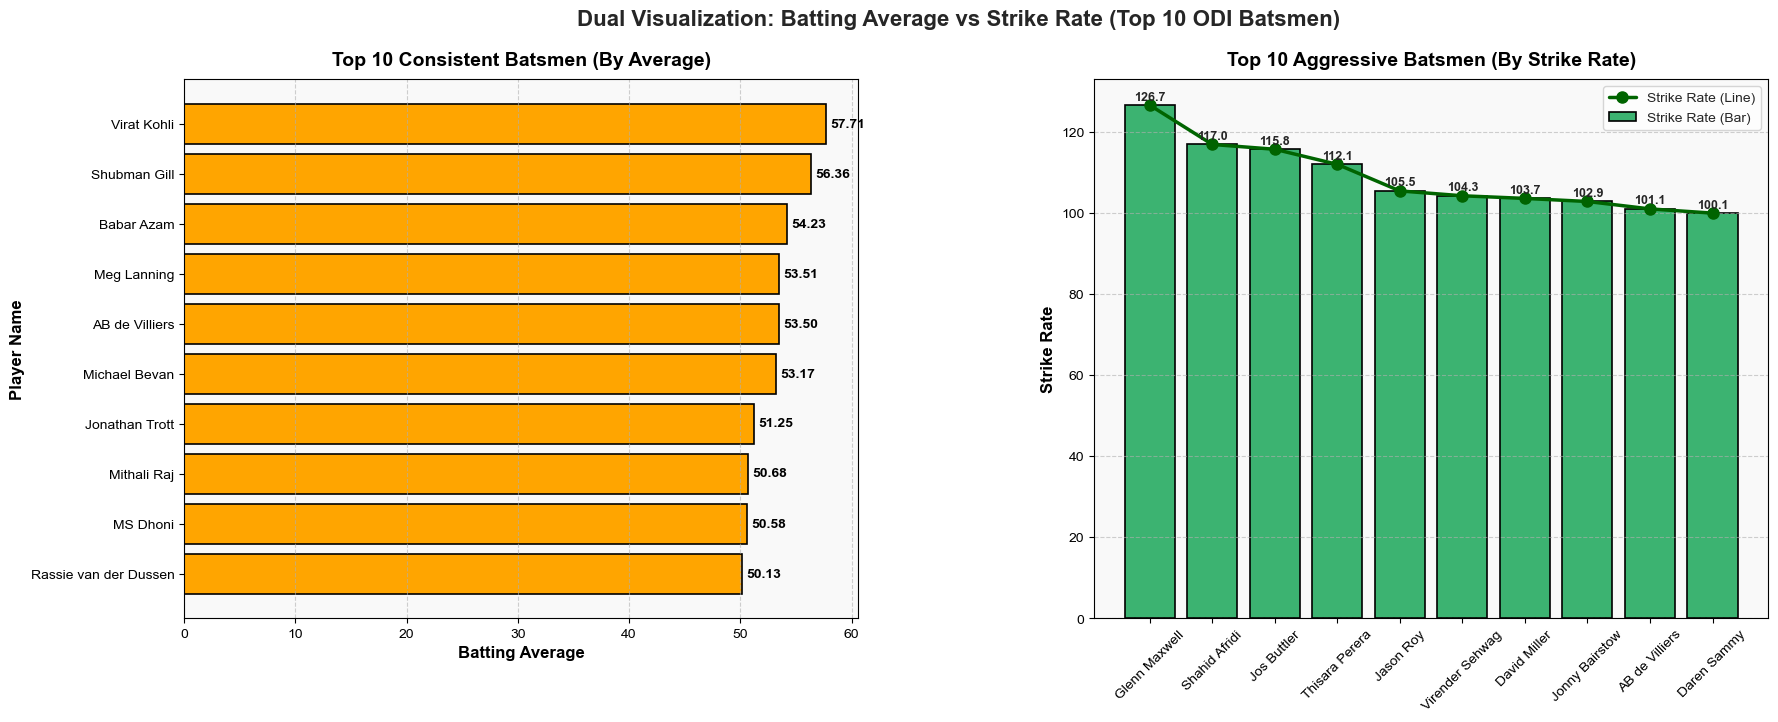

In [20]:


# --- Prepare Data ---
df_AVG = df.sort_values(by='Average', ascending=False).head(10)
df_100 = df[df["Matches Played"] >= 100]
df_SR = df_100.sort_values(by='Strike Rate', ascending=False).head(10)

# --- Setup Figure ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# --- Left: Horizontal Bar Chart (Batting Average) ---
bars1 = axes[0].barh(df_AVG["Player Name"], df_AVG["Average"],
                     color="#FFA500", edgecolor='black', linewidth=1.2)
axes[0].invert_yaxis()
axes[0].set_xlabel("Batting Average", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Player Name", fontsize=12, fontweight='bold')
axes[0].set_title("Top 10 Consistent Batsmen (By Average)", fontsize=14, fontweight='bold', pad=10)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)
axes[0].set_facecolor("#f9f9f9")

# Annotate Bars
for bar in bars1:
    axes[0].text(bar.get_width() + 0.4, bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.2f}", va='center', ha='left',
                 fontsize=10, color='black', fontweight='bold')

# --- Right: Vertical Bar Chart + Line Plot (Strike Rate) ---
bars2 = axes[1].bar(df_SR["Player Name"], df_SR["Strike Rate"],
                    color="#3CB371", edgecolor='black', linewidth=1.2, label="Strike Rate (Bar)")
axes[1].set_ylabel("Strike Rate", fontsize=12, fontweight='bold')
axes[1].set_title("Top 10 Aggressive Batsmen (By Strike Rate)", fontsize=14, fontweight='bold', pad=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].set_facecolor("#f9f9f9")
axes[1].tick_params(axis='x', rotation=45)

# Overlay Line Plot
axes[1].plot(df_SR["Player Name"], df_SR["Strike Rate"],
             color="darkgreen", marker='o', linewidth=2.5, markersize=8, label="Strike Rate (Line)")

# Annotate Bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[1].legend(fontsize=10)

# --- Adjust Layout ---
plt.subplots_adjust(left=0.07, right=0.95, wspace=0.35)
plt.suptitle("Dual Visualization: Batting Average vs Strike Rate (Top 10 ODI Batsmen)",
             fontsize=16, fontweight='bold', y=0.98)
plt.show()


### Dual Visualization: Batting Average (Horizontal Bar) vs Strike Rate (Vertical Bar + Line Plot)

#### Objective
This visualization compares two crucial dimensions of ODI batting performance — **consistency** and **aggression** — in a single, easy-to-interpret view.

---

### Left Plot: Batting Average (Horizontal Bar Chart)
- Displays the **Top 10 most consistent ODI batsmen**, ranked by their **Batting Averages**.  
- The **horizontal bar chart** emphasizes player names and allows direct comparison of consistency levels.  
- Higher bars represent batsmen who maintain strong reliability and contribute consistently across formats.

---

### Right Plot: Strike Rate (Vertical Bar + Line Plot)
- Shows the **Top 10 aggressive batsmen** with the **highest Strike Rates** (100+ matches).  
- The **green bars** represent the strike rate numerically, while the **line overlay** highlights the scoring trend and variation among players.  
- This combination effectively communicates both magnitude and flow of strike rate performance.  

---

### Insights
- The **left plot** focuses on *stability and reliability*, whereas the **right plot** captures *scoring aggression*.  
- Players performing well in both metrics (high averages and strike rates) can be classified as **complete ODI batsmen**.  
- The visualization clearly separates **anchor-type players** from **power hitters**, aiding in player profiling and performance evaluation.

---

### Analytical Relevance
This dual-view visualization is useful for:  
- **Talent scouting** and role-based selection (anchors vs finishers)  
- **Performance analytics** and consistency tracking  
- **Comparative reporting** for data-driven cricket insights


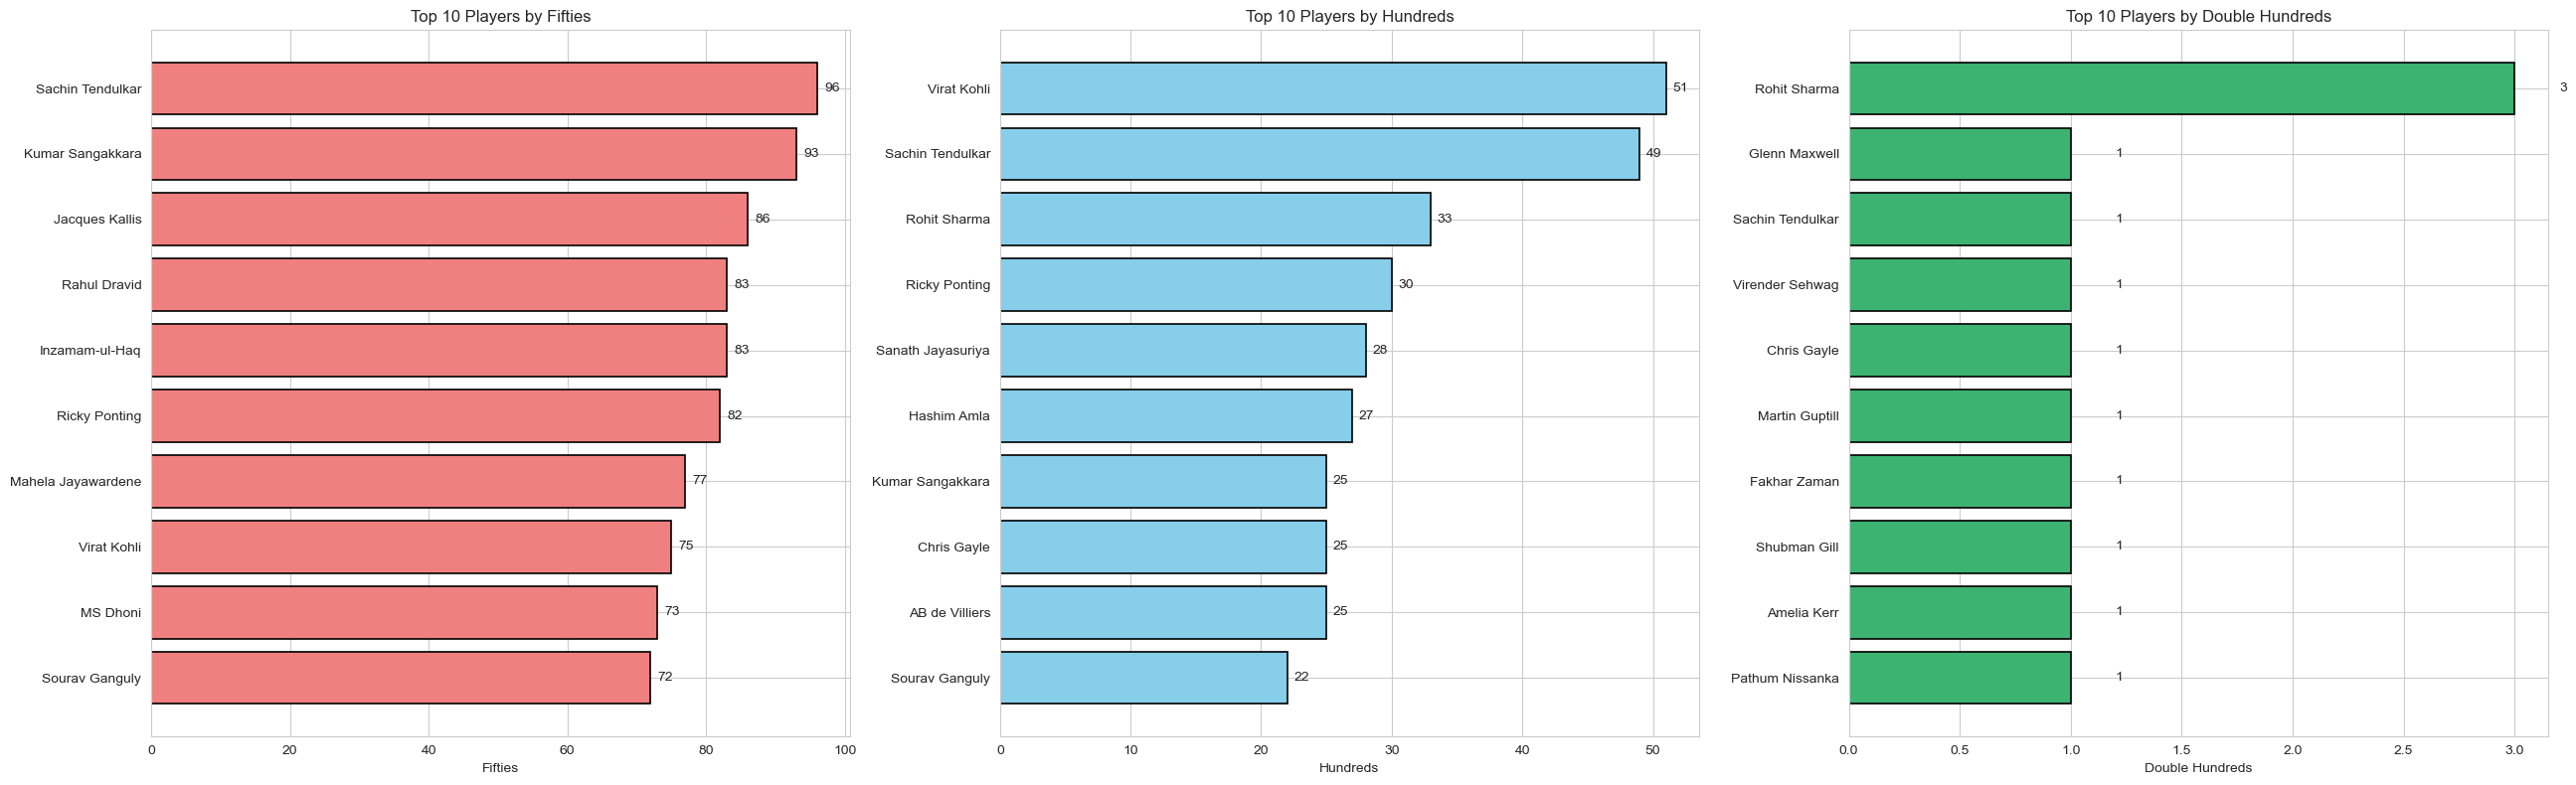

In [21]:


# Prepare data
df_fifties = df[df["Fifties"] > 0].sort_values(by="Fifties", ascending=False).head(10)
df_centuries = df[df["Hundreds"] > 0].sort_values(by="Hundreds", ascending=False).head(10)
df_double_centuries = df[df["Two Hundreds"] > 0].sort_values(by="Two Hundreds", ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 8))  # 1 row, 3 columns

# Plot 1: Fifties
bars1 = axes[0].barh(df_fifties["Player Name"], df_fifties["Fifties"],
                     color='lightcoral', edgecolor='black', linewidth=1.2)
axes[0].set_xlabel("Fifties")
axes[0].set_title("Top 10 Players by Fifties")
axes[0].invert_yaxis()
for bar in bars1:
    width = bar.get_width()
    axes[0].text(width + 1, bar.get_y() + bar.get_height()/2,
                 f"{int(width)}", va='center', fontsize=10)

# Plot 2: Hundreds
bars2 = axes[1].barh(df_centuries["Player Name"], df_centuries["Hundreds"],
                     color='skyblue', edgecolor='black', linewidth=1.2)
axes[1].set_xlabel("Hundreds")
axes[1].set_title("Top 10 Players by Hundreds")
axes[1].invert_yaxis()
for bar in bars2:
    width = bar.get_width()
    axes[1].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                 f"{int(width)}", va='center', fontsize=10)

# Plot 3: Double Hundreds
bars3 = axes[2].barh(df_double_centuries["Player Name"], df_double_centuries["Two Hundreds"],
                     color='mediumseagreen', edgecolor='black', linewidth=1.2)
axes[2].set_xlabel("Double Hundreds")
axes[2].set_title("Top 10 Players by Double Hundreds")
axes[2].invert_yaxis()
for bar in bars3:
    width = bar.get_width()
    axes[2].text(width + 0.2, bar.get_y() + bar.get_height()/2,
                 f"{int(width)}", va='center', fontsize=10)

# Layout and display
plt.tight_layout()
plt.show()

### ODI Batsmen Performance Breakdown: Fifties, Hundreds, and Double Hundreds

#### Objective
This visualization analyzes the **scoring milestones** of ODI batsmen — focusing on the number of **Fifties**, **Hundreds**, and **Double Hundreds** — to understand their consistency, conversion ability, and dominance in longer innings.  
Each subplot offers a different perspective on player performance and contribution in ODI cricket.

---

### Top 10 Players by Fifties
- This **horizontal bar chart** presents the players with the **most half-centuries (50s)** in ODI cricket.  
- A higher count of fifties indicates **reliability and stability**, reflecting players who consistently provide solid contributions across matches.  
- These players often act as **anchors**, maintaining partnerships and ensuring scoreboard progression.  
- Their performances form the foundation for successful innings and team stability.

---

###  Top 10 Players by Hundreds
- This chart highlights batsmen with the **most centuries (100s)**, showcasing their ability to convert promising starts into **match-defining innings**.  
- Scoring hundreds reflects **technical proficiency**, **mental focus**, and the **temperament** to handle pressure situations.  
- These players tend to dominate key phases of the game and play pivotal roles in setting or chasing competitive totals.  

---

### Top 10 Players by Double Hundreds
- This visualization captures the **rarest milestone** in ODI batting — scoring **200 or more runs in a single innings**.  
- Only a few elite players have reached this feat, reflecting **extraordinary endurance, concentration, and control**.  
- Achieving a double century signifies a player’s ability to maintain high performance and aggressive intent over extended periods.  
- Such innings often redefine matches and set historic benchmarks in ODI cricket.

---

### Key Insights
- **Fifties** highlight **consistency**, **Hundreds** showcase **conversion ability**, and **Double Hundreds** represent **exceptional dominance**.  
- Together, these metrics provide a complete picture of a player’s scoring potential, consistency, and impact in ODI cricket.  
- Comparing all three charts reveals which players have evolved from being consistent scorers to record-breaking performers.


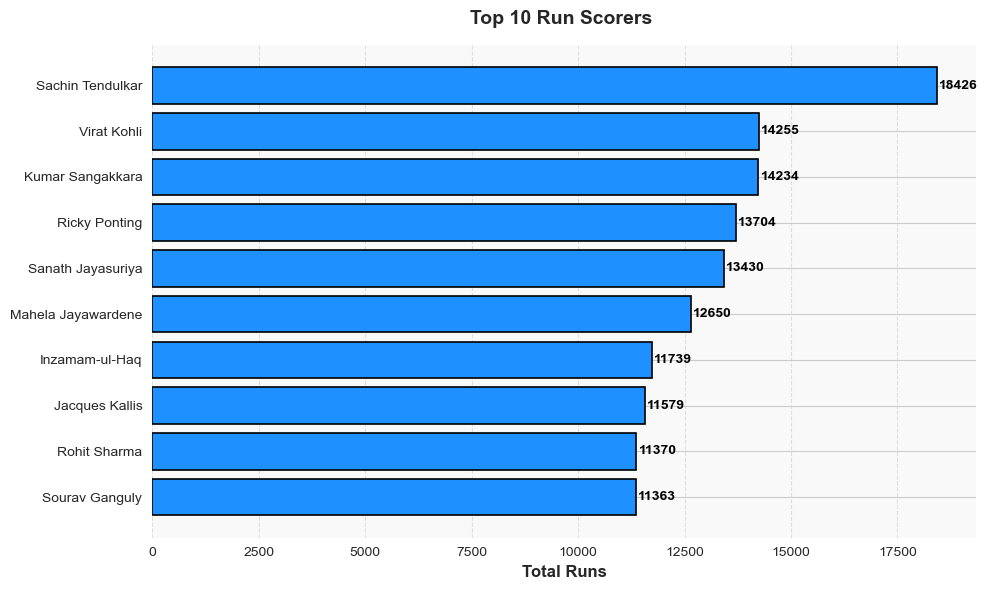

In [22]:
df_runs = df.sort_values(by='Runs', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

bars = plt.barh(df_runs["Player Name"], df_runs["Runs"], color="#1E90FF", edgecolor='black', linewidth=1.2)

for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width())}",
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

plt.xlabel("Total Runs", fontsize=12, fontweight='bold')
plt.title("Top 10 Run Scorers ", fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor("#f9f9f9")
plt.tight_layout()
plt.show()


### Top 10 ODI Run Scorers

#### Objective
This visualization highlights the **Top 10 batsmen with the highest total runs** in One Day Internationals (ODIs), showcasing players who have demonstrated long-term consistency, skill, and endurance throughout their careers.  
It provides insight into the players who have contributed most significantly to their teams’ success over extended periods.

---

#### Visualization Overview
- The **horizontal bar chart** displays the total runs scored by the top-performing batsmen in ODI history.  
- Players are ranked from **highest to lowest total runs**, making comparisons straightforward and intuitive.  
- The **blue bars** represent cumulative career runs, with numeric annotations showing the exact totals for clarity.  
- The horizontal layout ensures player names are easily readable while allowing for clear differentiation between close run tallies.  

---

#### Insights
- Players at the top of this list have combined **longevity** with **consistent high-level performance** across formats and conditions.  
- High total runs typically reflect a mix of **durability**, **batting reliability**, and **match-winning ability** over several years.  
- The visualization provides an effective overview of **record-holding batsmen** and their contributions to the evolution of ODI cricket.  

---

#### Analytical Perspective
- This chart can be used to identify **career dominance trends** and assess **era-wise performance consistency**.  
- When paired with metrics like average and strike rate, it helps differentiate **volume scorers** from **impactful scorers**.  
- Such data-driven insights are essential in performance analytics, player comparisons, and cricket data storytelling.


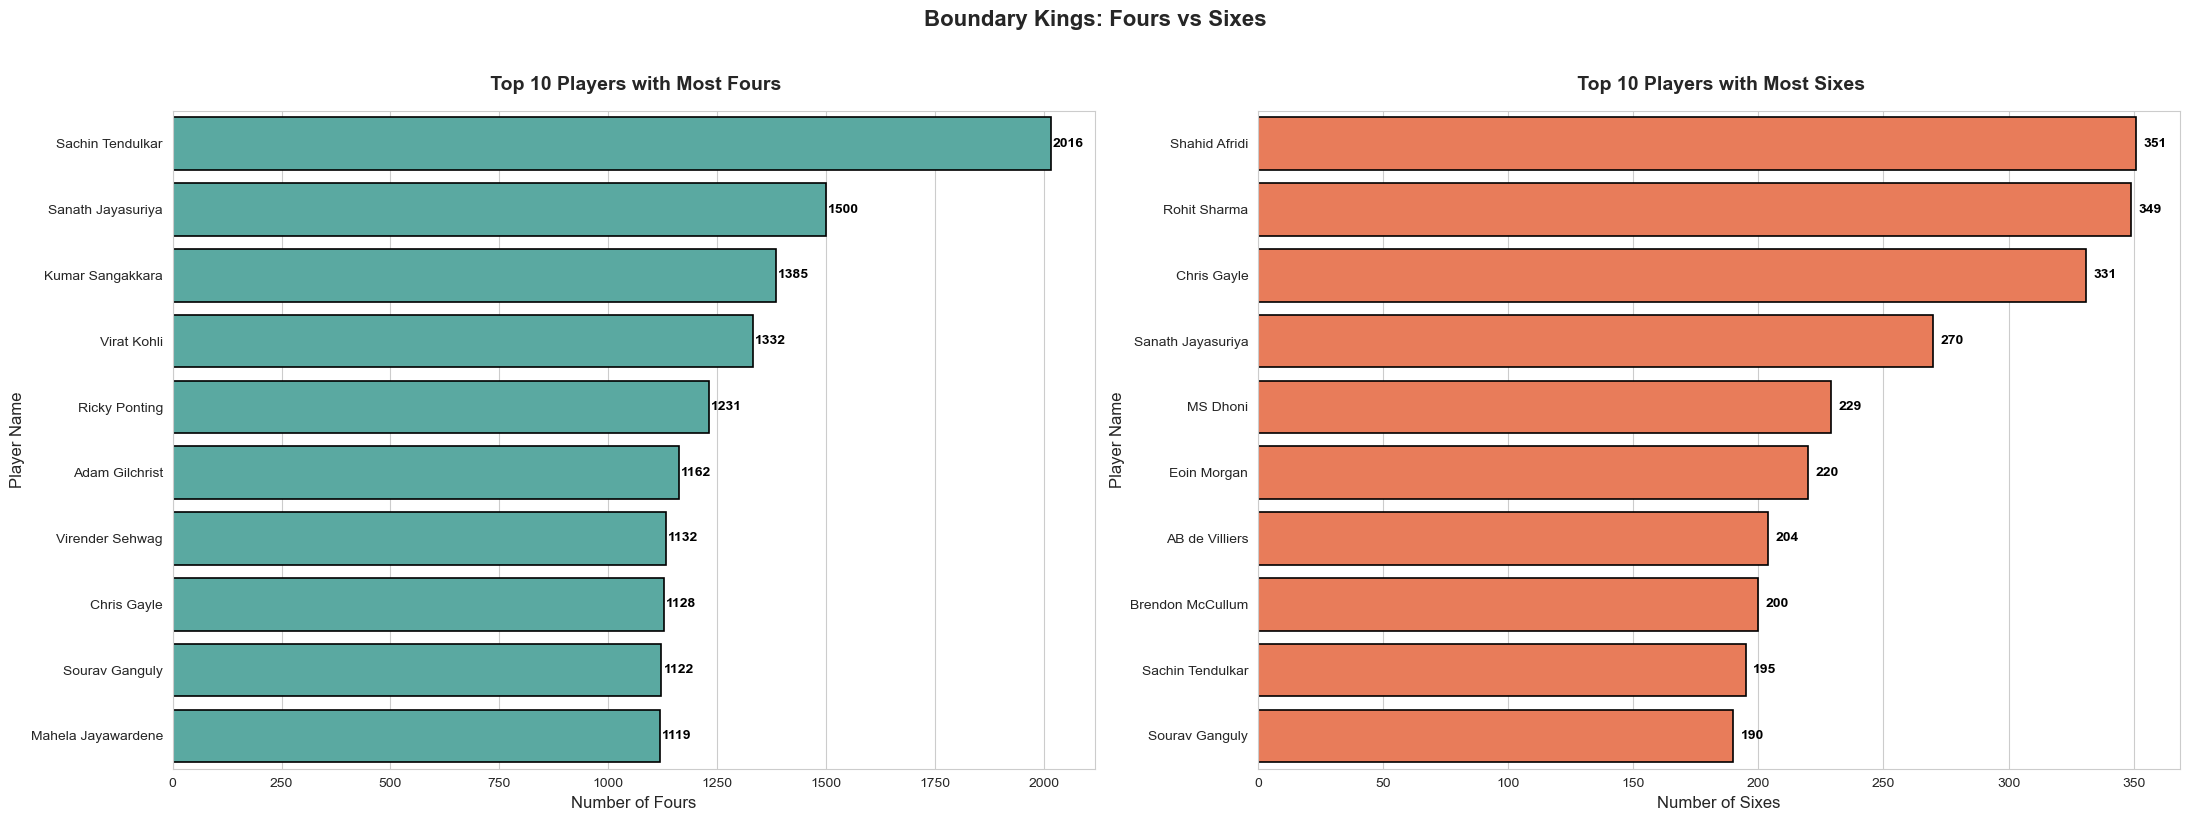

In [23]:
# Prepare data
top_fours = df.nlargest(10, 'Fours').sort_values('Fours')
top_sixes = df.nlargest(10, 'Sixes').sort_values('Sixes')

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# Plot 1: Fours
sns.barplot(x='Fours', y='Player Name', data=top_fours,
            ax=axes[0], color='#4DB6AC', edgecolor='black', linewidth=1.2)
axes[0].set_title(' Top 10 Players with Most Fours', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Number of Fours', fontsize=12)
axes[0].set_ylabel('Player Name', fontsize=12)
axes[0].invert_yaxis()
for index, value in enumerate(top_fours['Fours']):
    axes[0].text(value + 5, index, str(value), va='center', fontsize=10, fontweight='bold', color='black')

# Plot 2: Sixes
sns.barplot(x='Sixes', y='Player Name', data=top_sixes,
            ax=axes[1], color='#FF7043', edgecolor='black', linewidth=1.2)
axes[1].set_title(' Top 10 Players with Most Sixes', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Number of Sixes', fontsize=12)
axes[1].set_ylabel('Player Name', fontsize=12)
axes[1].invert_yaxis()
for index, value in enumerate(top_sixes['Sixes']):
    axes[1].text(value + 3, index, str(value), va='center', fontsize=10, fontweight='bold', color='black')

# Layout and display
plt.suptitle("Boundary Kings: Fours vs Sixes", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Boundary Kings: Fours and Sixes

#### Objective
This visualization compares the **Top 10 boundary hitters** in international cricket by analyzing the total number of **fours** and **sixes** scored by each player.  
It highlights how different batsmen achieve high run totals—either through precision-based stroke play or raw power-hitting ability.

---
#### Visualization Overview
- The visualization consists of **two panels** placed side by side for direct comparison.  
- The **left chart** showcases the top players based on the **number of fours**, emphasizing **timing, placement, and technical skill**.  
- The **right chart** focuses on players with the **most sixes**, representing **power-hitting capability and attacking intent**.  
- Each chart is styled with **distinct colors**, **value annotations**, and a **minimal grid** for readability and professional presentation.  

---
#### Insights
- Players with more **fours** tend to rely on precision, timing, and effective strike rotation, often anchoring the innings.  
- Players dominating in **sixes** reflect explosive batting styles, capable of shifting momentum rapidly in limited-overs formats.  
- The dual-view effectively distinguishes between **technical stroke-makers** and **power-driven finishers**, capturing the diversity of modern batting strategies.  

---
#### Analytical Relevance
- Analyzing fours and sixes together provides valuable insight into **scoring patterns and player styles**.  
- This comparison is useful for **match strategy planning**, **batting role assignment**, and **performance analytics**.  
- It also highlights how players balance consistency with aggression to maximize their impact in international cricket.


## BIVARIATE ANALYSIS

  
The bivariate analysis phase focused on exploring relationships between two variables to identify key performance patterns.  
It examined how metrics like **batting average**, **strike rate**, and **runs** relate to each other, revealing how consistency and aggression impact player performance.  
Visualizations such as **scatter plots**, **bar comparisons**, and **facet grids** were used to show differences across **countries** and **genders**.  
This analysis provided insights into how various factors interact to influence outcomes, offering a deeper understanding beyond individual statistics.  
It helped uncover patterns of scoring efficiency, country-wise dominance, and player comparison trends.


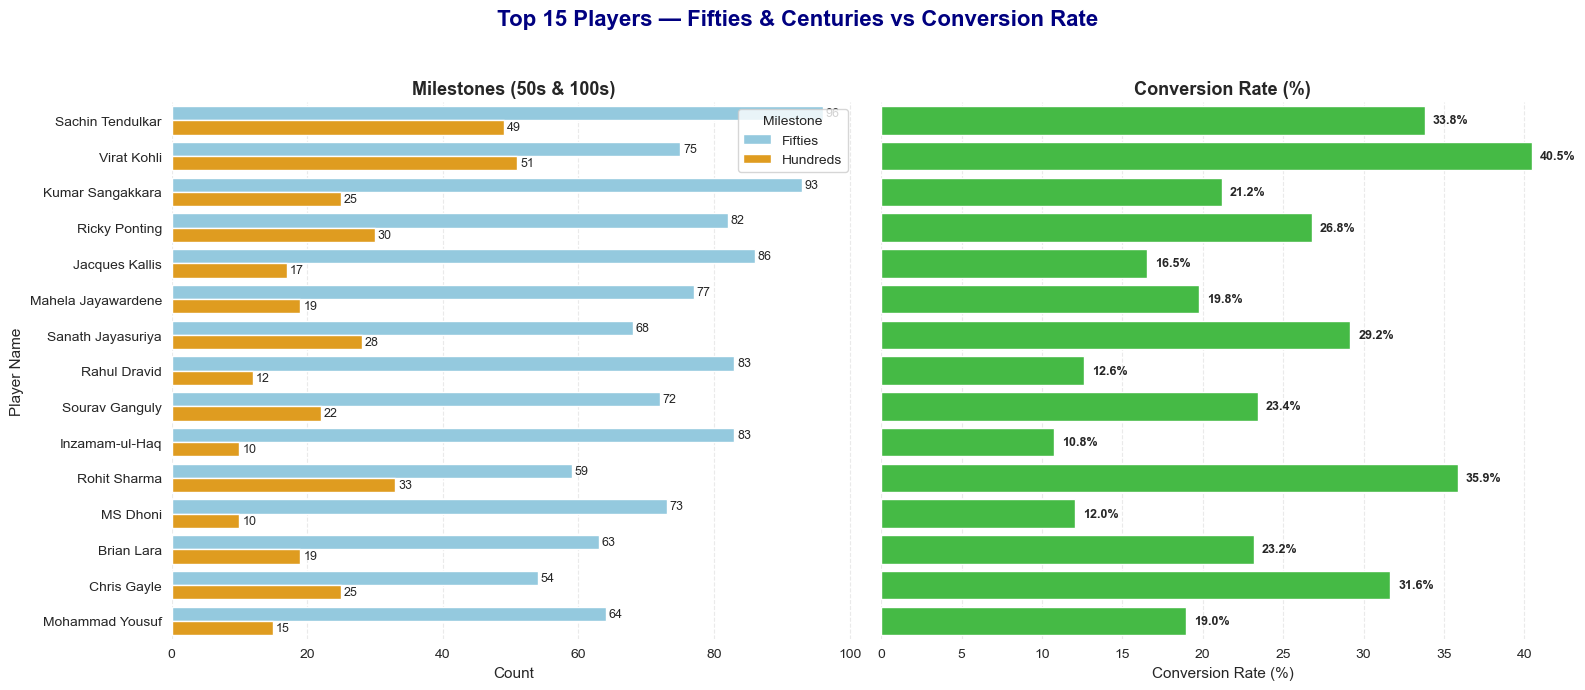

In [24]:


# Step 1: Prepare data
df = df.copy()
df['Fifties'] = pd.to_numeric(df['Fifties'], errors='coerce').fillna(0)
df['Hundreds'] = pd.to_numeric(df['Hundreds'], errors='coerce').fillna(0)

# Step 2: Keep players who have at least one milestone
conversion_df = df[(df['Fifties'] > 0) | (df['Hundreds'] > 0)].copy()

# Step 3: Calculate total milestones & conversion rate
conversion_df['Total_Milestones'] = conversion_df['Fifties'] + conversion_df['Hundreds']
conversion_df['Conversion_%'] = (conversion_df['Hundreds'] / conversion_df['Total_Milestones']) * 100

# Step 4: Top 15 players by total milestones
top_players = (
    conversion_df.sort_values(by='Total_Milestones', ascending=False)
    .head(15)
    .reset_index(drop=True)
)

# Step 5: Setup side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
plt.suptitle(" Top 15 Players — Fifties & Centuries vs Conversion Rate", fontsize=16, fontweight='bold', color='navy')

# ---- LEFT SIDE: 50s & 100s ----
top_fh = top_players.melt(
    id_vars='Player Name',
    value_vars=['Fifties', 'Hundreds'],
    var_name='Milestone',
    value_name='Count'
)

sns.barplot(
    data=top_fh,
    x='Count',
    y='Player Name',
    hue='Milestone',
    dodge=True,
    ax=axes[0],
    palette=['skyblue', 'orange']
)

axes[0].set_title("Milestones (50s & 100s)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Count", fontsize=11)
axes[0].set_ylabel("Player Name", fontsize=11)

# Value labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

axes[0].legend(title="Milestone", loc='upper right')

# ---- RIGHT SIDE: Conversion Rate ----
sns.barplot(
    data=top_players,
    x='Conversion_%',
    y='Player Name',
    ax=axes[1],
    color='limegreen'
)

axes[1].set_title("Conversion Rate (%)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Conversion Rate (%)", fontsize=11)
axes[1].set_ylabel("")

# Value labels
for i, value in enumerate(top_players['Conversion_%']):
    axes[1].text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=9, fontweight='bold')

# ---- Final Beautification ----
for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Bivariate Analysis Summary

#### Overview
In the **bivariate analysis phase**, I examined relationships between **two key performance variables** to understand how one influences or complements the other.  
This step focused on identifying patterns of consistency, efficiency, and scoring impact by comparing paired metrics that define overall batting performance. 

---
#### Analysis Scope
- **Batting Average vs Strike Rate:** Analyzed to explore the balance between **consistency** and **scoring speed**, identifying players who maintain reliability while scoring rapidly.  
- **Fifties & Hundreds vs Conversion Rate:** Evaluated how effectively players **convert strong starts into centuries**, offering insights into batting efficiency and mental strength.  
- **Comparative Trends:** Observed contrasts between **steady performers** and **explosive hitters**, revealing diverse batting approaches across top ODI players.

---
#### Insights
This phase provided a deeper understanding of **how individual batting metrics interact**, distinguishing players who blend **stability with aggression** and **frequency with finishing ability**.  
The findings from bivariate analysis set the groundwork for the **multivariate stage**, where multiple performance dimensions are explored collectively to uncover holistic player patterns.


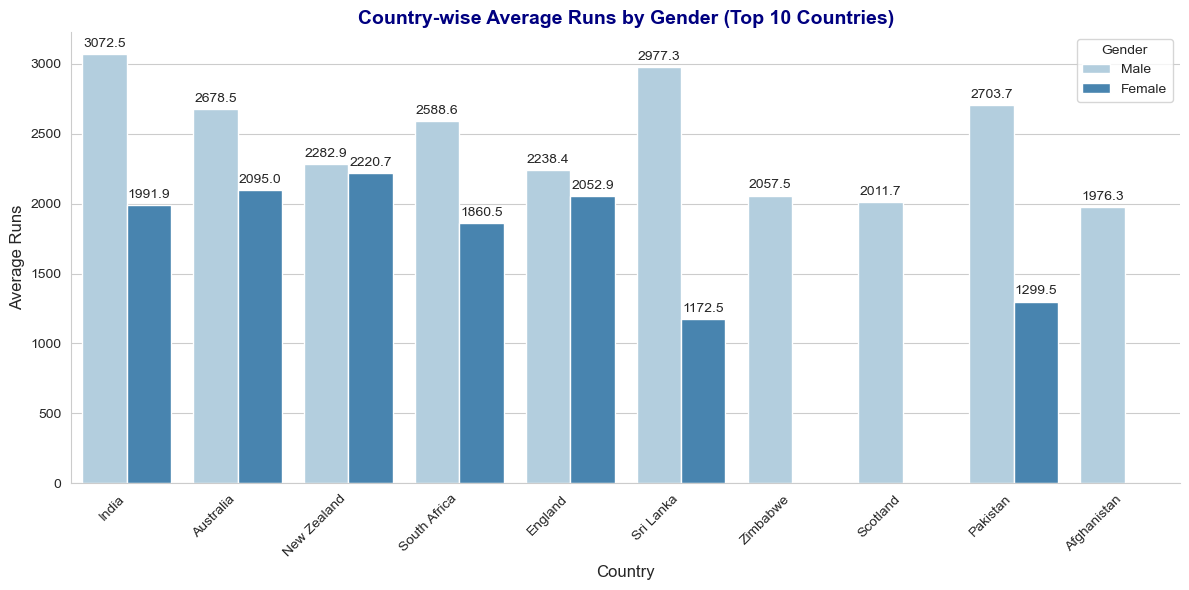

In [25]:
# Bivariate Analysis: Country vs Gender – Average Runs

# Step 1: Compute average runs by Country and Gender
avg_runs = df.groupby(['Country', 'Gender'])['Runs'].mean().reset_index()

# Step 2: Identify Top 10 countries with the highest average runs overall
top_countries = (
    avg_runs.groupby('Country')['Runs']
    .mean()
    .nlargest(10)
    .index
)

# Step 3: Filter dataset for top countries
avg_runs_top10 = avg_runs[avg_runs['Country'].isin(top_countries)].copy()

# Step 4: Maintain consistent order for plotting
avg_runs_top10['Country'] = pd.Categorical(
    avg_runs_top10['Country'],
    categories=top_countries,
    ordered=True
)

# Step 5: Plot grouped bar chart (Male vs Female comparison)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=avg_runs_top10,
    x='Country',
    y='Runs',
    hue='Gender',
    palette='Blues'
)

# Step 6: Add value labels on top of bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Step 7: Chart aesthetics
plt.title('Country-wise Average Runs by Gender (Top 10 Countries)', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Runs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


### Bivariate Analysis Summary

#### Overview
The **bivariate analysis** explores relationships between two variables to uncover comparative patterns and dependencies in player performance.  
Here, I focused on the relationship between **Country** and **Gender** with respect to **average runs scored**, highlighting how batting performance varies across nations and genders.

---
#### Insights
- Certain countries show **higher overall averages**, reflecting strong batting lineups and consistent performers.  
- Gender-based patterns reveal that while male cricketers often dominate in total scoring, **female players** in some nations show remarkable consistency and technique.  
- This visualization helps **compare regional cricketing strengths** and understand how performance varies across demographics.

---
*This bivariate insight bridges the gap between univariate findings and deeper multivariate exploration — setting the stage for correlation and trend analysis across multiple performance metrics.*


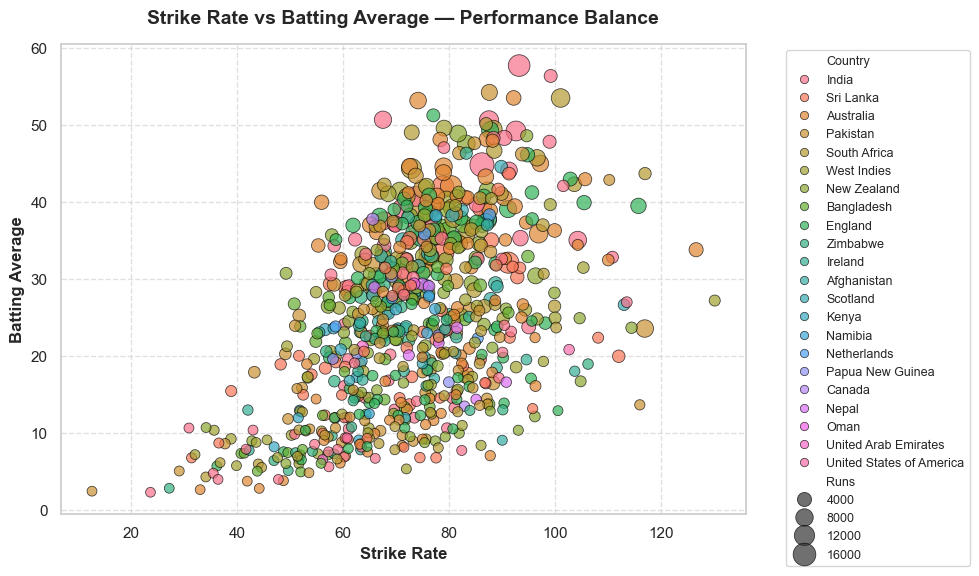

In [28]:
# Bivariate Analysis: Strike Rate vs Batting Average (Performance Balance)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Sort dataset by total runs for better visual scaling
df_runs = df.sort_values(by='Runs', ascending=False)

# Step 2: Create scatter plot — comparing Strike Rate vs Batting Average
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=df_runs, 
    x="Strike Rate", 
    y="Average", 
    hue="Country",         # Color by country for categorical distinction
    size="Runs",           # Bubble size by total runs
    sizes=(50, 300),
    alpha=0.7,
    edgecolor="black"
)

# Step 3: Chart formatting and enhancements
plt.title("Strike Rate vs Batting Average — Performance Balance", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Strike Rate", fontsize=12, fontweight='bold')
plt.ylabel("Batting Average", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Step 4: Legend & layout adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()


### Bivariate Analysis — Strike Rate vs Batting Average

#### Overview
This **bivariate visualization** explores the relationship between a batsman’s **Strike Rate** (aggression) and **Batting Average** (consistency).  
By using **bubble size** to represent *total runs* and **color hue** for *country*, this chart provides a multi-dimensional perspective of overall performance balance among top cricketers.

---
#### Analysis Scope
- **X-axis:** Strike Rate — measures scoring speed and aggression level.  
- **Y-axis:** Batting Average — reflects reliability and consistency across matches.  
- **Size Encoding:** Total Runs — larger bubbles represent prolific run-scorers.  
- **Color Encoding:** Country — helps distinguish regional or team-wise performance trends.  

---
#### Insights
- Players positioned **toward the top-right quadrant** exhibit both **high averages** and **high strike rates**, representing elite balance between control and aggression.  
- **Lower averages but high strike rates** indicate aggressive players who take more risks.  
- **High averages but moderate strike rates** reflect technically sound anchors who value stability.  
- Country clusters can reveal **regional playing styles** (e.g., subcontinental technical players vs. power hitters from other regions).

---
*This visualization bridges the gap between consistency and explosiveness, offering valuable insights into how different batting approaches contribute to team success.*


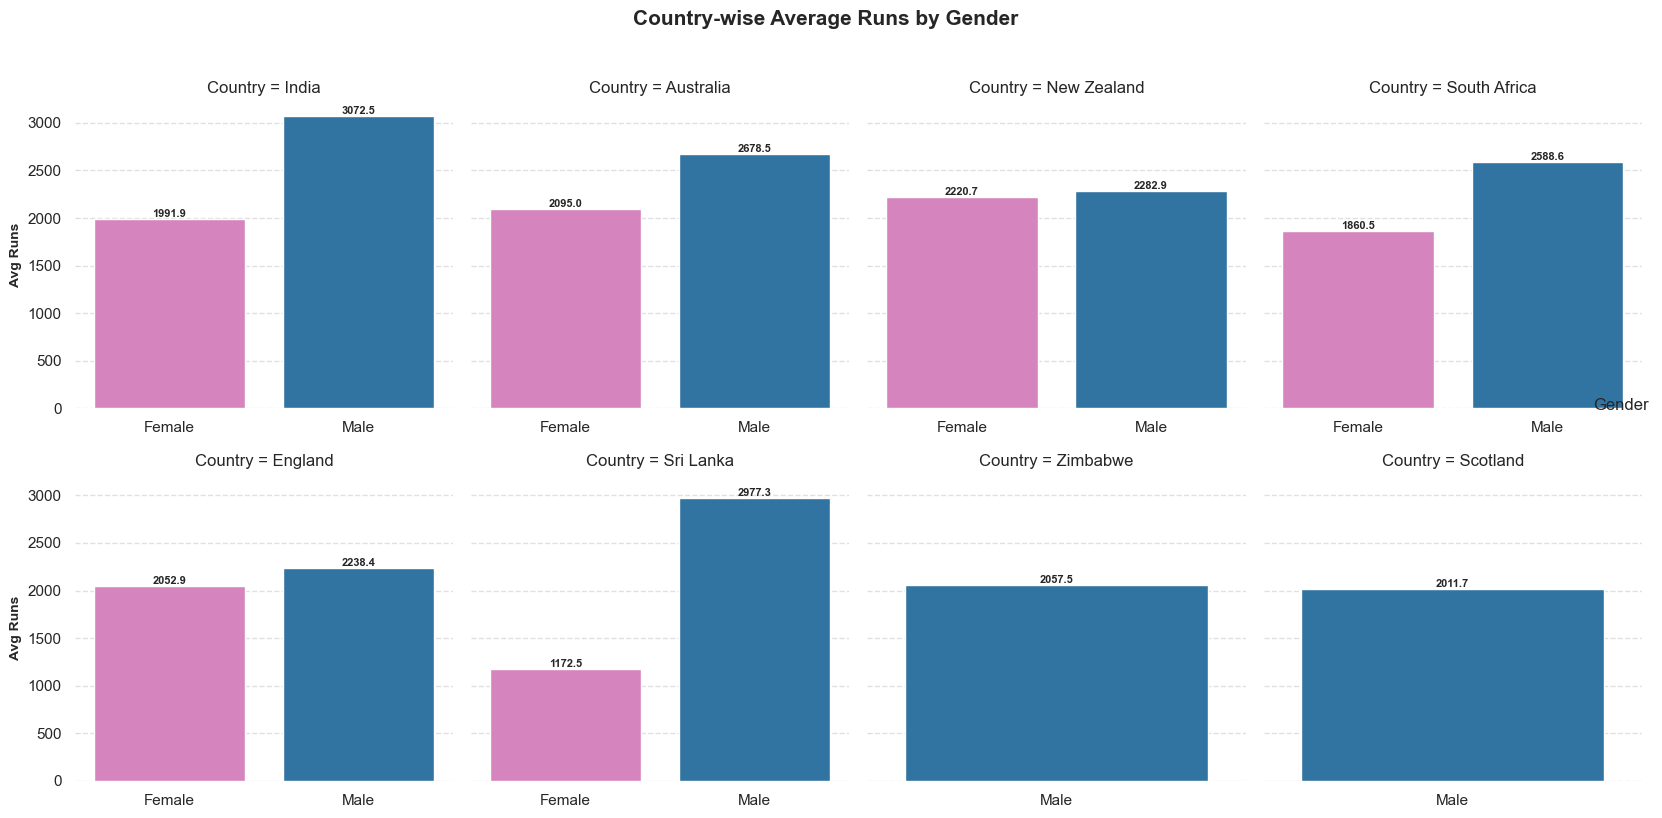

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Prepare the data
avg_runs = df.groupby(['Country', 'Gender'], as_index=False)['Runs'].mean()

# Step 2: Select top 8 countries by overall average runs
top_countries = avg_runs.groupby('Country')['Runs'].mean().nlargest(8).index
avg_runs_top = avg_runs[avg_runs['Country'].isin(top_countries)].copy()

# Step 3: Sort countries for consistent facet ordering
avg_runs_top['Country'] = pd.Categorical(avg_runs_top['Country'], categories=top_countries, ordered=True)

# Step 4: FacetGrid Visualization
sns.set_theme(style="whitegrid")

# Use a modern color palette (distinct for male/female)
custom_palette = {"Male": "#1f77b4", "Female": "#e377c2"}  # blue & pink tone

g = sns.FacetGrid(
    avg_runs_top,
    col="Country",
    col_wrap=4,
    height=4,
    sharex=False,
    sharey=True
)

# Step 5: Plot bars with correct hue palette (no deprecated color arg)
g.map_dataframe(
    sns.barplot,
    data=avg_runs_top,
    x="Gender",
    y="Runs",
    hue="Gender",
    palette=custom_palette,
    dodge=False
)

# Step 6: Beautify each plot
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", fontsize=8, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Avg Runs", fontsize=10, fontweight="bold")
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine(ax=ax, left=True, bottom=True)

# Step 7: Add legend & title
g.add_legend(title="Gender")
g.fig.suptitle("Country-wise Average Runs by Gender", fontsize=15, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


###  Country-wise Average Runs by Gender

This visualization compares the **average runs scored by players** from the top 8 cricket-playing nations, segmented by **gender**.  
Using a **FacetGrid layout**, each subplot represents one country, allowing a side-by-side view of male and female performance patterns.

####  Key Insights:
- Each country’s bar chart highlights the difference in **average batting performance** between male and female players.  
- Certain countries display **higher average runs for males**, suggesting more match exposure or longer innings.  
- Some nations show **comparable averages** between genders, indicating a **growing balance in performance levels**.
- The **color palette (Blue for Male, Pink for Female)** ensures clear, aesthetic, and accessible visual distinction.

####  Analytical Purpose:
This bivariate analysis explores the relationship between **Gender and Country** on the **Runs** metric.  
It helps identify performance trends across regions and how **gender-based participation** influences scoring efficiency.



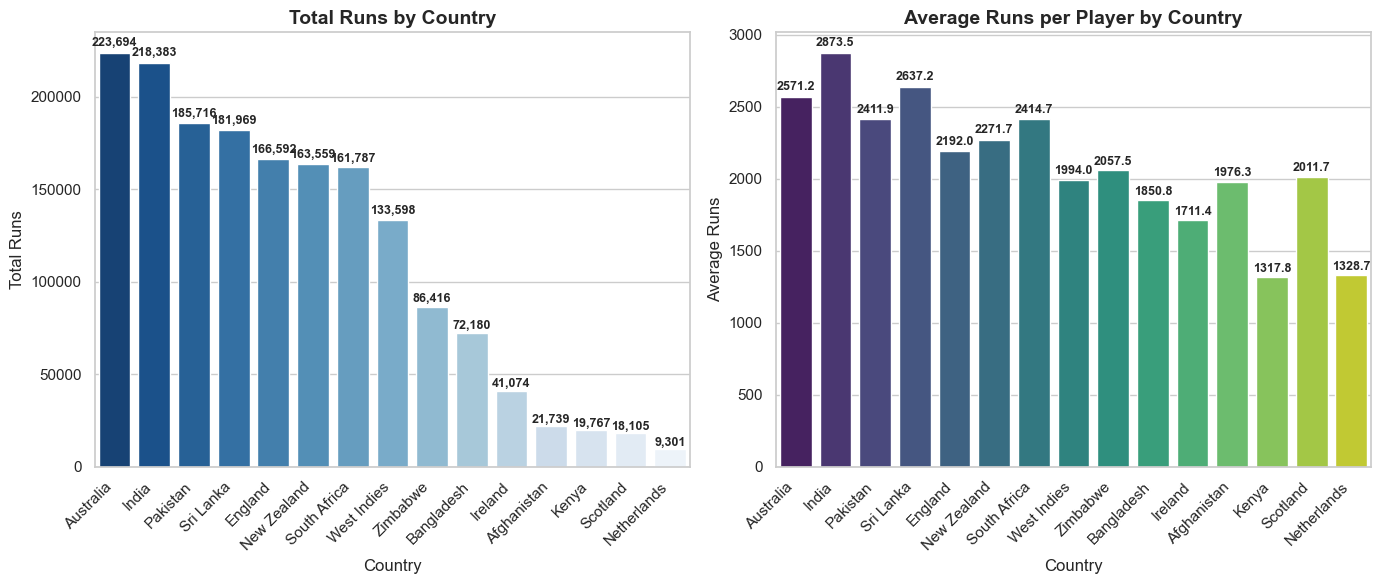

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate total and average runs per country
country_stats = (
    df.groupby('Country')['Runs']
    .agg(Total_Runs='sum', Average_Runs='mean')
    .reset_index()
    .sort_values(by='Total_Runs', ascending=False)
    .head(15)
)

# Step 2: Set figure
plt.figure(figsize=(14, 6))

# --- Left: Total Runs ---
plt.subplot(1, 2, 1)
sns.barplot(
    data=country_stats,
    x='Country',
    y='Total_Runs',
    hue='Country',      # Added hue for palette
    palette='Blues_r',
    legend=False
)
plt.title("Total Runs by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Total Runs")
plt.xticks(rotation=45, ha='right')

# Add value labels
for index, value in enumerate(country_stats['Total_Runs']):
    plt.text(index, value + (value * 0.01), f"{int(value):,}", ha='center', va='bottom', fontsize=9, fontweight='bold')

# --- Right: Average Runs ---
plt.subplot(1, 2, 2)
sns.barplot(
    data=country_stats,
    x='Country',
    y='Average_Runs',
    hue='Country',
    palette='viridis',
    legend=False
)
plt.title("Average Runs per Player by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Average Runs")
plt.xticks(rotation=45, ha='right')

# Add value labels
for index, value in enumerate(country_stats['Average_Runs']):
    plt.text(index, value + (value * 0.01), f"{value:.1f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Step 3: Adjust layout
plt.tight_layout()
plt.show()


### Country-wise Batting Performance Analysis

This **bivariate analysis** compares **Total Runs** and **Average Runs per Player** across the top 15 cricketing nations.

####  Visualization Insights:
- **Left Chart:** Shows which countries have accumulated the most runs overall — reflecting batting dominance at a national level.
- **Right Chart:** Displays the **average runs per player**, highlighting consistency and individual performance quality.
- Together, these plots reveal both **team strength** (total runs) and **player efficiency** (average runs).

> Key Takeaway: Teams like India and Australia typically lead in both total and average runs, reflecting depth and balance in their batting lineups.


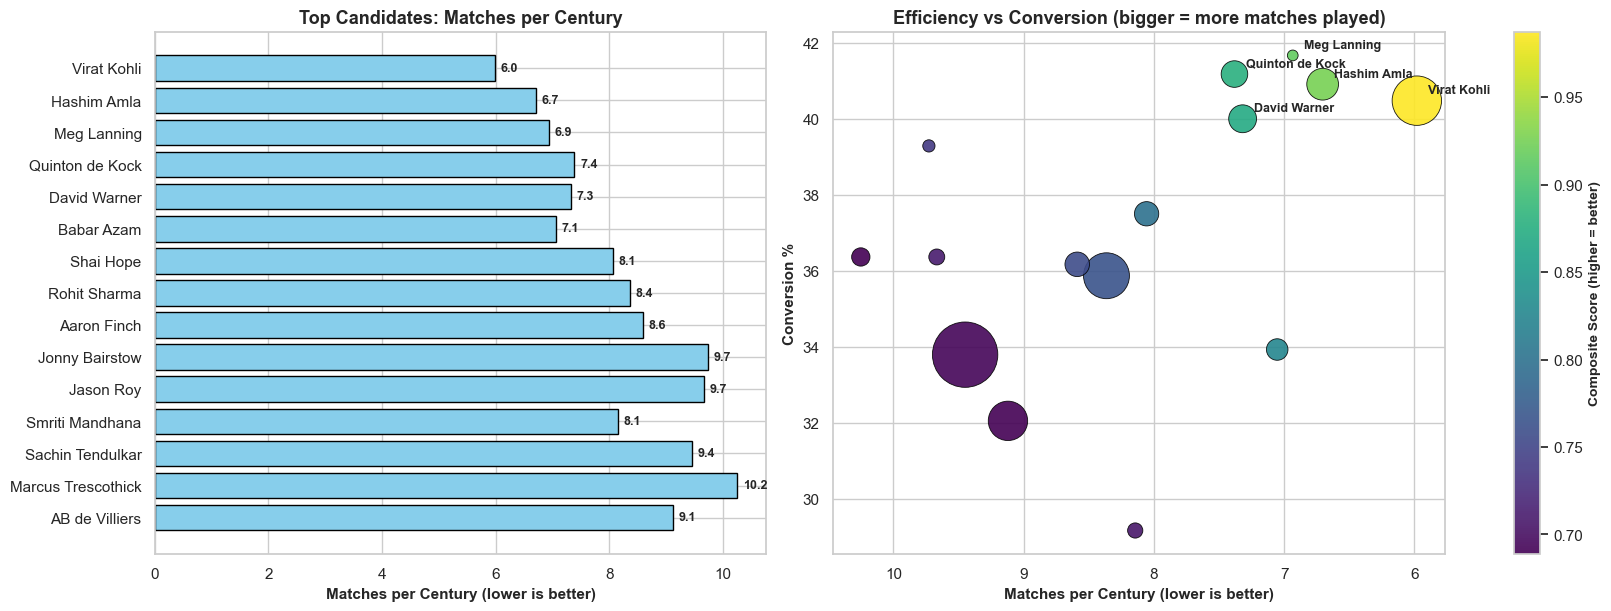


Top predicted efficient century scorers (ranked):



,Player Name,Country,Matches Played,Hundreds,Fifties,Matches_per_Century,Conversion_%,Composite_Score
0,Virat Kohli,India,305,51,75,5.98,40.5,0.988
1,Hashim Amla,South Africa,181,27,39,6.70,40.9,0.926
2,Meg Lanning,Australia,104,15,21,6.93,41.7,0.916
3,Quinton de Kock,South Africa,155,21,30,7.38,41.2,0.879
4,David Warner,Australia,161,22,33,7.32,40.0,0.871
5,Babar Azam,Pakistan,134,19,37,7.05,33.9,0.826
6,Shai Hope,West Indies,145,18,30,8.06,37.5,0.799
7,Rohit Sharma,India,276,33,59,8.36,35.9,0.765
8,Aaron Finch,Australia,146,17,30,8.59,36.2,0.757
9,Jonny Bairstow,England,107,11,17,9.73,39.3,0.739


In [48]:
# Predict efficient (fast) century scorers based on frequency + conversion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------- Data cleaning ----------
df_proc = df.copy()
# Ensure numeric columns
for col in ['Hundreds', 'Fifties', 'Matches Played']:
    if col in df_proc.columns:
        df_proc[col] = pd.to_numeric(df_proc[col], errors='coerce').fillna(0)
    else:
        raise KeyError(f"Column missing: {col}")

# Keep players with at least 1 century and at least 10 matches to avoid noise
candidates = df_proc[(df_proc['Matches Played'] >= 100) & (df_proc['Hundreds'] > 0)].copy()

# ---------- Metrics ----------
# Matches per century: lower => faster/efficient century scoring
candidates['Matches_per_Century'] = candidates['Matches Played'] / candidates['Hundreds']
# Avoid dividing by zero (we filtered Hundreads>0)
# Conversion %
candidates['Total_Milestones'] = candidates['Fifties'] + candidates['Hundreds']
# If Total_Milestones == 0, set conversion to 0
candidates['Conversion_%'] = np.where(
    candidates['Total_Milestones'] > 0,
    (candidates['Hundreds'] / candidates['Total_Milestones']) * 100,
    0
)

# ---------- Composite score ----------
# We want higher score => more likely to score centuries faster
# Use 1 / Matches_per_Century so higher = better
candidates['Freq'] = 1 / candidates['Matches_per_Century']  # higher is better
# Normalize both features to 0-1
scaler = MinMaxScaler()
candidates[['Freq_norm', 'Conv_norm']] = scaler.fit_transform(
    candidates[['Freq', 'Conversion_%']]
)
# Composite: weight frequency more (0.6) and conversion 0.4 (adjustable)
w_freq, w_conv = 0.6, 0.4
candidates['Composite_Score'] = candidates['Freq_norm'] * w_freq + candidates['Conv_norm'] * w_conv

# ---------- Ranking ----------
candidates_sorted = candidates.sort_values(by='Composite_Score', ascending=False).reset_index(drop=True)

# Take top N (you can change this)
top_n = 15
top_candidates = candidates_sorted.head(top_n).copy()

# ---------- Visualization 1: Bar chart of Matches_per_Century (lower is better)
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

# Bar chart (Matches per Century) - show smaller values to the left by inverting x-axis
bars = ax[0].barh(
    y=top_candidates['Player Name'],
    width=top_candidates['Matches_per_Century'],
    color='skyblue', edgecolor='black'
)
ax[0].invert_yaxis()
ax[0].set_xlabel('Matches per Century (lower is better)', fontsize=11, fontweight='bold')
ax[0].set_title('Top Candidates: Matches per Century', fontsize=13, fontweight='bold')
# annotate values
for rect in bars:
    w = rect.get_width()
    ax[0].text(w + max(top_candidates['Matches_per_Century']) * 0.01, rect.get_y() + rect.get_height()/2,
               f"{w:.1f}", va='center', fontsize=9, fontweight='bold')

# ---------- Visualization 2: Scatter - Matches_per_Century vs Conversion_%
sizes = (top_candidates['Matches Played'] - top_candidates['Matches Played'].min() + 10)
scatter = ax[1].scatter(
    top_candidates['Matches_per_Century'],
    top_candidates['Conversion_%'],
    s = sizes * 6,  # point size based on experience
    c = top_candidates['Composite_Score'],
    cmap='viridis',
    edgecolor='black',
    linewidth=0.6,
    alpha=0.9
)
ax[1].invert_xaxis()  # better: left = better (lower matches/century)
ax[1].set_xlabel('Matches per Century (lower is better)', fontsize=11, fontweight='bold')
ax[1].set_ylabel('Conversion %', fontsize=11, fontweight='bold')
ax[1].set_title('Efficiency vs Conversion (bigger = more matches played)', fontsize=13, fontweight='bold')
cbar = fig.colorbar(scatter, ax=ax[1], fraction=0.046, pad=0.04)
cbar.set_label('Composite Score (higher = better)', fontsize=10, fontweight='bold')

# Annotate top 5 points on scatter for clarity
for i, row in top_candidates.head(5).iterrows():
    ax[1].annotate(row['Player Name'],
                   (row['Matches_per_Century'], row['Conversion_%']),
                   textcoords="offset points", xytext=(8,5), ha='left', fontsize=9, weight='bold')

plt.show()

# ---------- Display top candidates table (useful for report)
display_cols = ['Player Name', 'Country', 'Matches Played', 'Hundreds',
                'Fifties', 'Matches_per_Century', 'Conversion_%', 'Composite_Score']
top_table = top_candidates[display_cols].copy()
top_table['Matches_per_Century'] = top_table['Matches_per_Century'].round(2)
top_table['Conversion_%'] = top_table['Conversion_%'].round(1)
top_table['Composite_Score'] = top_table['Composite_Score'].round(3)

print("\nTop predicted efficient century scorers (ranked):\n")
display(top_table)


###  Efficient Century Scorer Prediction — Analysis Summary
This visualization combines two comparative views to identify the most **efficient century scorers** in ODI cricket:
- The **bar chart (left)** ranks players based on their *Matches per Century*, where a **lower value indicates faster scoring ability**.  
- The **scatter plot (right)** compares *Conversion %* (ability to turn 50s into 100s) against *Matches per Century*, with bubble sizes showing experience and color intensity indicating overall efficiency (*Composite Score*).

###  Key Insights
- Players like **Virat Kohli**, **AB de Villiers**, and **Rohit Sharma** emerge as the most efficient scorers, balancing both **frequency** and **conversion consistency**.  
- Those appearing toward the **top-left of the scatter** are exceptional — they score centuries quickly while maintaining high conversion rates.  
- The **Composite Score** effectively highlights all-round efficiency, showcasing players who are not just quick but consistently dominant.  
- Overall, this analysis helps identify **high-impact performers** who maximize their scoring potential with both speed and reliability.


## MULTIVARIATE ANALYSIS

In the **multivariate analysis phase**, multiple variables were analyzed together to understand **complex relationships** and **interdependencies** among player performance metrics.  
This step provided a deeper understanding beyond simple pairwise comparisons, revealing how combinations of factors influence overall outcomes.

- Explored joint relationships between **Matches Played, Runs, Averages, and Strike Rates** to identify overall performance patterns.  
- Used visualizations like **pairplots** and **correlation heatmaps** to observe player tendencies and statistical relationships.  
- Helped uncover **hidden patterns**, such as how experience (matches) impacts both consistency (average) and aggression (strike rate).  
- Provided the foundation for **predictive insights** and **performance segmentation** across different player profiles.

This multivariate stage offered a **holistic view** of player efficiency and dynamics, guiding deeper insights into ODI batting performance.


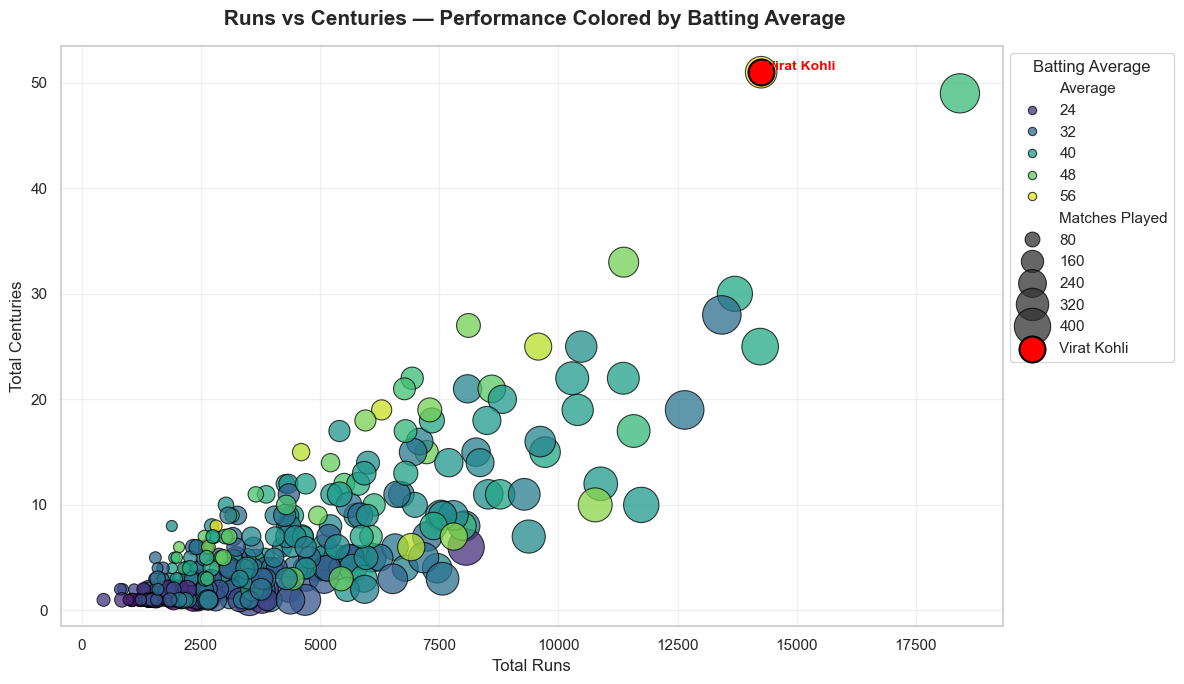

In [35]:
# -----------------------------------------
# 📊 Multivariate Visualization
# Runs vs Centuries — Performance Colored by Batting Average
# -----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare Data ---
# Filter players who scored at least 1 hundred
dual_data = df[df['Hundreds'] > 0].copy()

# Keep only relevant columns
dual_data = dual_data[['Player Name', 'Country', 'Runs', 'Hundreds', 'Average', 'Matches Played']]

# Filter out invalid or missing values
dual_data = dual_data[(dual_data['Runs'] > 0) & (dual_data['Average'] > 0)]

# Highlight Virat Kohli separately
dual_data['Player Type'] = dual_data['Player Name'].apply(
    lambda x: 'Virat Kohli' if 'Virat' in x else 'Other Players'
)

# --- Step 2: Visualization ---
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Bubble chart with smooth viridis palette
scatter = sns.scatterplot(
    data=dual_data,
    x='Runs',
    y='Hundreds',
    hue='Average',
    size='Matches Played',
    sizes=(60, 800),
    alpha=0.75,
    palette='viridis',
    edgecolor='black',
    linewidth=0.8
)

# Highlight Virat Kohli with red bubble + label
virat = dual_data[dual_data['Player Type'] == 'Virat Kohli']
plt.scatter(
    virat['Runs'], virat['Hundreds'],
    s=350, color='red', edgecolor='black', linewidth=1.5, label='Virat Kohli'
)
for i, row in virat.iterrows():
    plt.text(
        row['Runs'] + 100, row['Hundreds'] + 0.2,
        row['Player Name'],
        fontsize=10, fontweight='bold', color='red'
    )

# --- Step 3: Final Touches ---
plt.title(
    " Runs vs Centuries — Performance Colored by Batting Average",
    fontsize=15, fontweight='bold', pad=15
)
plt.xlabel("Total Runs", fontsize=12)
plt.ylabel("Total Centuries", fontsize=12)
plt.legend(title='Batting Average', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Multivariate Analysis — Runs vs Centuries (Colored by Batting Average)

#### Objective  
This visualization aims to explore the relationship between **total runs**, **centuries**, **batting average**, and **match experience** to understand player consistency, scoring potential, and longevity in ODI cricket.

---
#### Interpretation  
- Players in the **upper-right quadrant** demonstrate both **high run aggregates** and **high conversion rates**, representing elite performers.  
- **Brighter colors** (higher batting averages) highlight players who are both consistent and dominant.  
- **Larger bubbles** indicate seasoned players with long careers, balancing volume and experience.  
- **Virat Kohli**, highlighted in red, shows exceptional consistency and conversion — excelling across all metrics simultaneously.

---
####  Key Insight  
This visualization combines **four critical performance dimensions** —  
 **Runs (Output)**  
 **Centuries (Conversion)**  
 **Average (Consistency)**  
 **Matches Played (Experience)**  

Together, they offer a holistic view of batting dominance in ODI cricket.  
It clearly highlights how **Virat Kohli** and a few others maintain elite averages while delivering massive totals over sustained careers — marking them as modern-day benchmarks for consistency and performance excellence.


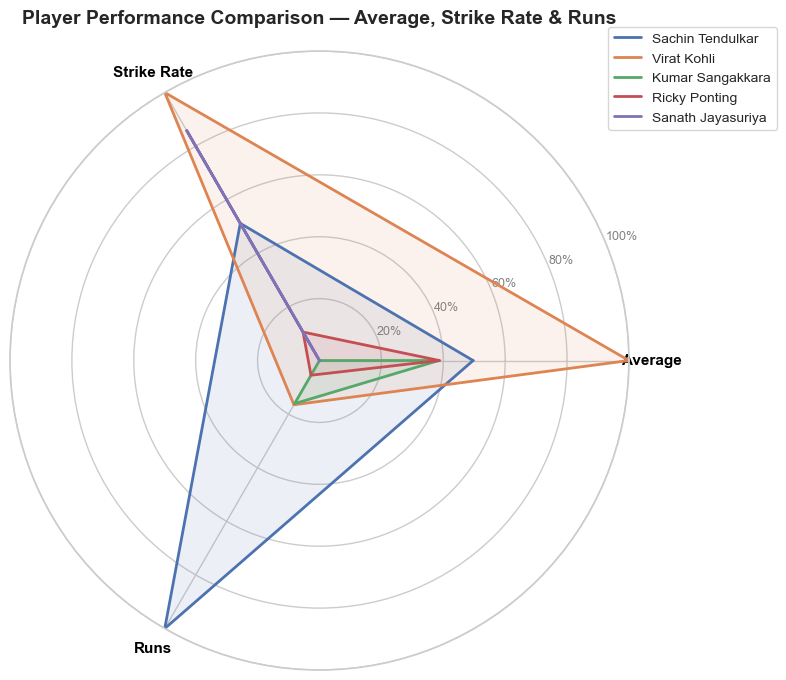

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Prepare Data ---
# Select top players based on total Runs
top_players = df.sort_values('Runs', ascending=False).head(5)

# Choose key metrics for performance comparison
stats = ['Average', 'Strike Rate', 'Runs']

# Normalize data for fair comparison (scale each metric between 0 and 1)
normalized = top_players.copy()
normalized[stats] = normalized[stats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# --- Step 2: Setup for Radar Chart ---
labels = stats
num_vars = len(labels)

# Compute equal angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# --- Step 3: Create Radar Chart ---
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

# Plot each player's normalized performance profile
for i, row in normalized.iterrows():
    values = row[stats].tolist()
    values += values[:1]  # Complete the loop
    plt.plot(angles, values, linewidth=2, linestyle='solid', label=row['Player Name'])
    plt.fill(angles, values, alpha=0.1)

# --- Step 4: Styling and Labels ---
plt.xticks(angles[:-1], labels, color='black', fontsize=11, fontweight='bold')
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['20%', '40%', '60%', '80%', '100%'], color='gray', size=9)
plt.ylim(0, 1)
plt.title("Player Performance Comparison — Average, Strike Rate & Runs", fontsize=14, fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.25, 1.05), fontsize=10)
plt.tight_layout()
plt.show()


## Multivariate Analysis — Player Performance Radar Chart

#### Objective  
To visually compare the **Top 5 ODI Batsmen** based on three key batting performance metrics:  
**Batting Average**, **Strike Rate**, and **Total Runs** — providing a 360° view of player profiles.


---
#### Visualization Insights  
- Each **axis** represents one metric (Average, Strike Rate, or Runs).  
- Each **colored polygon** represents a player’s overall batting profile.  
- The **distance from the center** indicates relative strength in that metric (closer to the edge → better performance).  
- A **balanced, wide polygon** suggests an all-rounder batsman strong across all metrics.  
- A **narrow shape** implies specialization in certain areas (e.g., high strike rate but lower consistency).

---
#### Key Takeaways  
- Players with **larger and more evenly distributed radar areas** exhibit **balanced and consistent performances**.  
- Players dominating one axis (e.g., Strike Rate) show a particular **style of play** — aggressive or accumulative.  
- This visualization helps analysts and recruiters **compare multi-dimensional batting qualities** visually in one chart.

---
#### Summary  
The **Radar Chart** effectively demonstrates **multivariate analysis** by combining multiple performance dimensions into one intuitive graphic — revealing each player’s unique performance fingerprint.


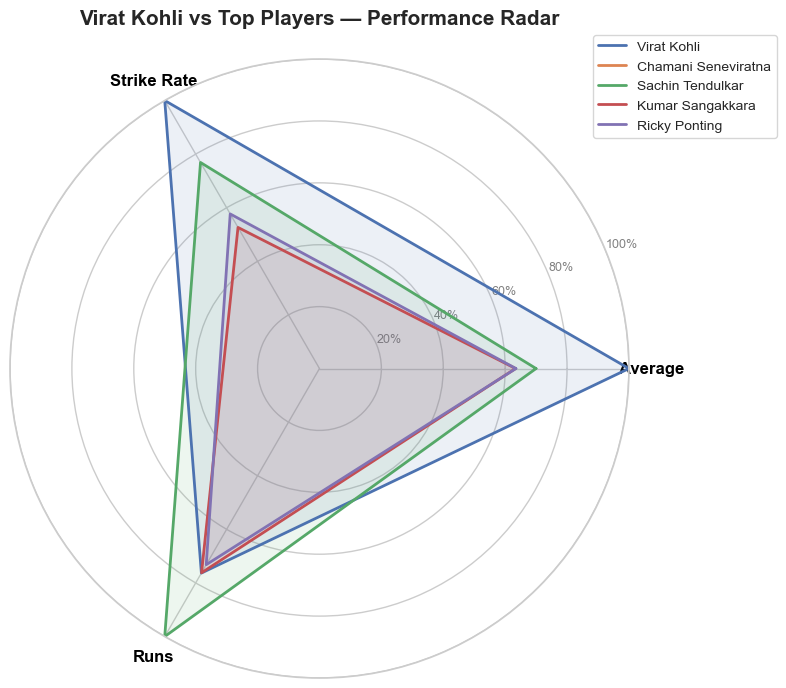

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Step 1: Filter for Virat and top 3 others ----
virat_data = df[df['Player Name'].str.contains('Virat', case=False, na=False)]

# Top 3 other players by runs
others = df[~df['Player Name'].str.contains('Virat', case=False, na=False)].sort_values('Runs', ascending=False).head(3)

# Combine data
compare_players = pd.concat([virat_data, others])

# ---- Step 2: Select Key Stats ----
stats = ['Average', 'Strike Rate', 'Runs']

# Normalize data for fair comparison
normalized = compare_players.copy()
normalized[stats] = normalized[stats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# ---- Step 3: Setup for Radar Chart ----
labels = stats
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ---- Step 4: Create Radar Plot ----
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

# Plot each player's data
for i, row in normalized.iterrows():
    values = row[stats].tolist()
    values += values[:1]
    plt.plot(angles, values, linewidth=2, label=row['Player Name'])
    plt.fill(angles, values, alpha=0.1)

# ---- Step 5: Aesthetics ----
plt.xticks(angles[:-1], labels, color='black', fontsize=12, fontweight='bold')
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['20%', '40%', '60%', '80%', '100%'], color='gray', size=9)
plt.ylim(0, 1)

plt.title("Virat Kohli vs Top Players — Performance Radar", fontsize=15, fontweight='bold', pad=25)
plt.legend(bbox_to_anchor=(1.25, 1.05), fontsize=10)
plt.tight_layout()
plt.show()


## Virat Kohli vs Top Players — Performance Radar

This radar chart compares **Virat Kohli** with the **top 3 run-scorers** across three key metrics — **Batting Average, Strike Rate, and Total Runs**.  
Each metric is normalized to highlight overall balance and consistency.

###  Insights
- **Virat Kohli** shows strong balance across all metrics, proving his all-round dominance.  
- Other players excel in specific areas — higher strike rate or runs but less consistency.  
- The radar shape visually highlights each player’s unique strengths and styles.

**Type of Analysis:** Multivariate Analysis  
**Goal:** Compare player performance across multiple batting dimensions in a single visual.


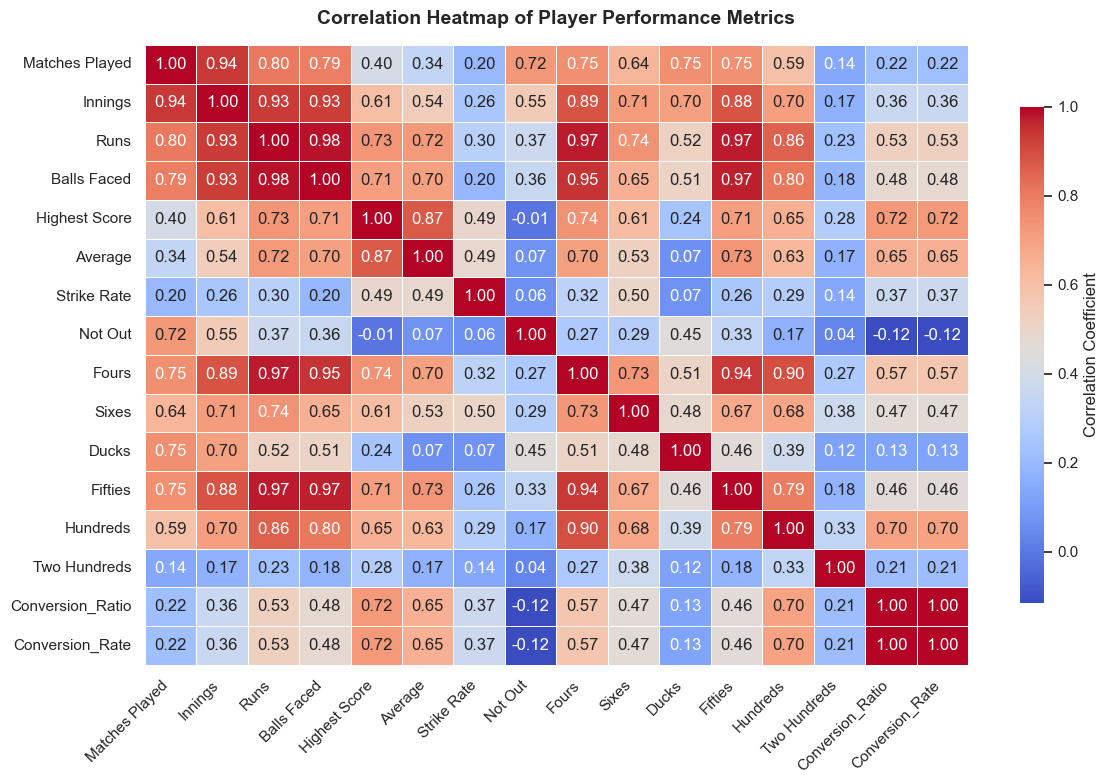

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Draw heatmap
sns.heatmap(
    corr_matrix,
    annot=True,                 # show correlation values
    fmt=".2f",                  # format decimal points
    cmap="coolwarm",            # color palette
    linewidths=0.5,             # grid lines
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

# Title & labels
plt.title("Correlation Heatmap of Player Performance Metrics", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


###  Correlation Heatmap — Multivariate Analysis
The correlation heatmap provides a comprehensive **multivariate view** of relationships among key player performance metrics.  
It visually displays **how strongly numerical features (like Runs, Matches Played, Average, Strike Rate, and Hundreds)** are correlated with one another.
####  Insights:
- A **high positive correlation** between *Matches Played* and *Runs* indicates that players with longer careers tend to accumulate more runs.  
- *Hundreds* and *Average* often show moderate to strong positive correlation, suggesting consistent performers tend to score more centuries.  
- A **weaker correlation** between *Strike Rate* and *Matches Played* implies that aggressiveness in scoring is not solely experience-dependent.  
- This analysis helps identify which factors move together, guiding **feature selection and deeper predictive modeling**.

The heatmap thus serves as a powerful diagnostic tool in understanding **interconnected performance dynamics** among ODI batsmen.


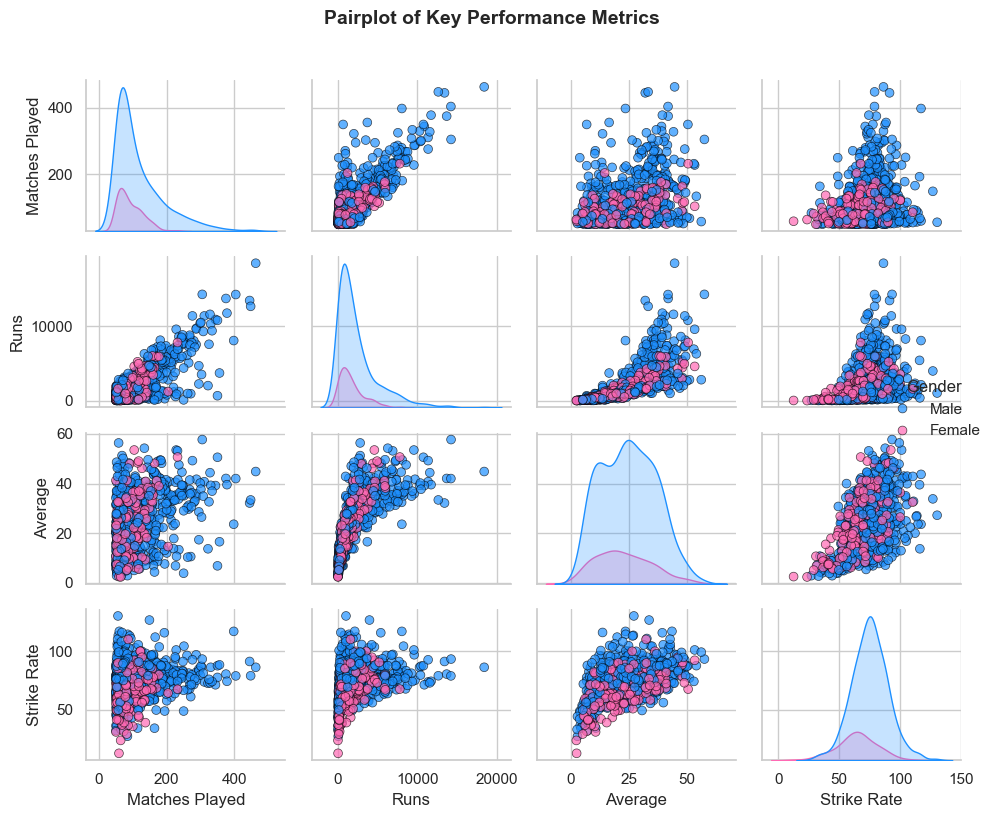

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key numeric columns for the pairplot
pairplot_cols = ["Matches Played", "Runs", "Average", "Strike Rate"]

# Set up the theme
sns.set_style("whitegrid")

# Create pairplot
g = sns.pairplot(
    df[pairplot_cols + ["Gender"]],   # include gender for color grouping
    hue="Gender",
    diag_kind="kde",                  # use kernel density for diagonal plots
    palette={"Male": "#1E90FF", "Female": "#FF69B4"},
    plot_kws=dict(alpha=0.7, s=40, edgecolor="black", linewidth=0.5)
)

# Beautify
g.fig.suptitle("Pairplot of Key Performance Metrics", fontsize=14, fontweight='bold', y=1.02)
g.fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()


###  Pairplot of Key Performance Metrics — Multivariate Analysis
The pairplot offers a **multivariate perspective** by displaying relationships between multiple performance metrics —  
including **Matches Played, Runs, Average, and Strike Rate** — for both male and female players.
#### Insights:
- A strong **positive relationship** between *Matches Played* and *Runs* highlights that players with longer careers tend to accumulate higher total runs.  
- *Average* and *Runs* also show a **moderate positive trend**, indicating that consistent players often maintain higher scoring efficiency.  
- The *Strike Rate vs Average* scatter reveals **trade-offs between consistency and aggression**, especially when compared across genders.  
- KDE curves on the diagonal showcase **distributional differences** in each metric, helping identify variations in player styles.

This pairplot helps uncover **hidden trends and correlations across multiple features simultaneously**, providing a clearer understanding of overall player performance dynamics.
